# Notebook 01: Data Exploration

Exploratory data analysis of the Ames Housing dataset to understand structure, identify patterns, and discover data quality issues.


## 1. Dataset Loading and Initial Assessment

### 1.1 Data Import and Shape Validation
Load training and test datasets, validate dimensions and create combined dataset.

In [168]:
# Load required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats  as stats
import seaborn as sns
from scipy import stats as stats

# Set display options
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
pd.set_option('display.width', None)
pd.set_option('display.max_colwidth', None)

# Load the datasets
df_train = pd.read_csv('../data/raw/train.csv')
df_test = pd.read_csv('../data/raw/test.csv')

# Create combined dataset for consistent feature analysis across train and test
df_combined = pd.concat([
    df_train.drop('SalePrice', axis=1), 
    df_test
], ignore_index=True)
df_combined['dataset_source'] = ['train']*len(df_train) + ['test']*len(df_test)

print("Dataset Dimensions:")
print(f"Training data: {df_train.shape}")
print(f"Test data: {df_test.shape}")
print(f"Features in training: {df_train.shape[1]}")
print(f"Features in test: {df_test.shape[1]}")

# Basic info about the dataset
print(f"\nDataset Overview:")
print(f"Total samples for training: {len(df_train)}")
print(f"Total samples for testing: {len(df_test)}")
print(f"Feature names (first 10): {list(df_train.columns[:10])}")

print(f"\nFirst 5 rows of training data:")
display(df_train.head())

Dataset Dimensions:
Training data: (1460, 81)
Test data: (1459, 80)
Features in training: 81
Features in test: 80

Dataset Overview:
Total samples for training: 1460
Total samples for testing: 1459
Feature names (first 10): ['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities']

First 5 rows of training data:


,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,"2,003",RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,NaN,0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,"1,976",RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,"2,001",RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,NaN,0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,"1,998",Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,"2,000",RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


Dataset contains 1,460 training samples and 1,459 test samples with 81 and 80 features respectively. 

### 1.2 Initial Data Types Overview
Examine pandas data types and feature distribution by dtype categories.

In [169]:
print("Data Types in Combined Dataset:")
print(df_combined.drop('dataset_source', axis=1).dtypes.value_counts())
print("\nData Types in Training Set:")
print(df_train.dtypes.value_counts())
print("\nData Types in Test Set:")
print(df_test.dtypes.value_counts())

Data Types in Combined Dataset:
object     43
int64      26
float64    11
Name: count, dtype: int64

Data Types in Training Set:
object     43
int64      35
float64     3
Name: count, dtype: int64

Data Types in Test Set:
object     43
int64      26
float64    11
Name: count, dtype: int64


The training dataset contains 81 features with a mix of numerical and categorical data types, while the test dataset has 80 features, excluding the target variable. The data types include integers, floats, and objects (for categorical variables).

### 1.3 Statistical Overview
A statistical overview of both numerical and categorical features to understand data distribution and characteristics 

#### Numerical Features

In [170]:
# Get numerical columns
numerical_cols = df_combined.select_dtypes(include=['int64', 'float64']).columns.tolist()
if 'Id' in numerical_cols:
    numerical_cols.remove('Id')  # Remove 'Id' if present as it is not a feature
if 'dataset_source' in numerical_cols:
    numerical_cols.remove('dataset_source')

print(f"Total numerical features: {len(numerical_cols)}")

# Basic descriptive statistics for numerical features
numerical_summary = df_combined[numerical_cols].describe()
print("\nDescriptive statistics for all numerical features:")
display(numerical_summary.round(2))


Total numerical features: 36

Descriptive statistics for all numerical features:


,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold
count,"2,919","2,433","2,919","2,919","2,919","2,919","2,919","2,896","2,918","2,918","2,918","2,918","2,919","2,919","2,919","2,919","2,917","2,917","2,919","2,919","2,919","2,919","2,919","2,919","2,760","2,918","2,918","2,919","2,919","2,919","2,919","2,919","2,919","2,919","2,919","2,919"
mean,57,69,"10,168",6,6,"1,971","1,984",102,441,50,561,"1,052","1,160",336,5,"1,501",0,0,2,0,3,1,6,1,"1,978",2,473,94,47,23,3,16,2,51,6,"2,008"
std,43,23,"7,887",1,1,30,21,179,456,169,440,441,392,429,46,506,1,0,1,0,1,0,2,1,26,1,215,127,68,64,25,56,36,567,3,1
min,20,21,"1,300",1,1,"1,872","1,950",0,0,0,0,0,334,0,0,334,0,0,0,0,0,0,2,0,"1,895",0,0,0,0,0,0,0,0,0,1,"2,006"
25%,20,59,"7,478",5,5,"1,954","1,965",0,0,0,220,793,876,0,0,"1,126",0,0,1,0,2,1,5,0,"1,960",1,320,0,0,0,0,0,0,0,4,"2,007"
50%,50,68,"9,453",6,5,"1,973","1,993",0,368,0,467,990,"1,082",0,0,"1,444",0,0,2,0,3,1,6,1,"1,979",2,480,0,26,0,0,0,0,0,6,"2,008"
75%,70,80,"11,570",7,6,"2,001","2,004",164,733,0,806,"1,302","1,388",704,0,"1,744",1,0,2,1,3,1,7,1,"2,002",2,576,168,70,0,0,0,0,0,8,"2,009"
max,190,313,"215,245",10,9,"2,010","2,010","1,600","5,644","1,526","2,336","6,110","5,095","2,065","1,064","5,642",3,2,4,2,8,3,15,4,"2,207",5,"1,488","1,424",742,"1,012",508,576,800,"17,000",12,"2,010"


**Distribution Characteristics:**
  - OverallQual: Mean 6/10, indicating average quality homes dominate
  - YearBuilt: Mean 1971, range 1872-2010 (138 years of housing stock)
  - GrLivArea: Mean 1,501 sqft, max 5,642 sqft (significant size variation)
  - LotArea: Mean 10,168 sqft but max 215,245 sqft (extreme outliers present)

  **Potential Data Quality Issues:**
  - LotArea max (215k sqft) suggests potential outliers needing investigation
  - GrLivArea max (5,642 sqft) may indicate luxury homes or data errors
  - GarageYrBlt max (2207) is clearly a data error 
  - MiscVal max ($17,000) with mean $51 indicates rare high-value features
  - Several zero minimums expected (pools, porches not universal)

  **Modeling Implications:**
  - High variance features (LotArea, GrLivArea) may benefit from log transformation
  - Quality ratings (1-10 scale) suggest ordinal encoding opportunities
  - Year features could generate age-based derived features


#### Categorical Features

In [171]:
# Get categorical columns
categorical_cols = df_combined.select_dtypes(include=['object', 'category']).columns.tolist()
if 'Id' in categorical_cols:
    categorical_cols.remove('Id')
if 'dataset_source' in categorical_cols:
    categorical_cols.remove('dataset_source')

print(f"Total categorical features: {len(categorical_cols)}\n")

print("Descriptive statistics for categorical features:")
display(df_combined[categorical_cols].describe(include='object').T)
            

Total categorical features: 43

Descriptive statistics for categorical features:


,count,unique,top,freq
MSZoning,2915,5,RL,2265
Street,2919,2,Pave,2907
Alley,198,2,Grvl,120
LotShape,2919,4,Reg,1859
LandContour,2919,4,Lvl,2622
Utilities,2917,2,AllPub,2916
LotConfig,2919,5,Inside,2133
LandSlope,2919,3,Gtl,2778
Neighborhood,2919,25,NAmes,443
Condition1,2919,9,Norm,2511


**High Missingness & Sparsity:**
  - Features like PoolQC, MiscFeature, Alley, Fence, and MasVnrType have large portions of missing data — likely due to absence of these features ratherthan data collection errors.

  **Category Dominance:**
  Strong mode dominance in many features:
  - MSZoning: RL dominates with 2265/2915 houses
  - Street: Paved nearly universal with 2907/2919 houses
  - Utilities: AllPub dominates with 2916/2917 houses
  - LandContour: Level lots most common with 2622/2919 houses
  - Neighborhood: NAmes leads with 443 houses among 25 types

  **Quality Distributions:**
  - Most quality ratings (ExterQual, KitchenQual, BsmtQual, etc.) cluster around "Typical/Average" (TA) or "Good" (Gd), indicating limited variability.

  **Structural Patterns:**
  - BldgType and HouseStyle are dominated by single-family, 1-story homes. Foundation, RoofStyle, and SaleType also show clear preferred types.

  **Modeling Considerations:**
  - Features with very low cardinality (e.g. Utilities, Street) may be dropped
  - Ordinal features like ExterQual and HeatingQC are suited for ordered encoding
  - Sparse features may be treated as binary indicators ("has pool", "has fence", etc.)


### 1.4 Feature Classification with Parser Integration

Validate feature classifications using official documentation and identify potential misclassifications that could impact preprocessing decisions

In [172]:
# Setup data description parser for domain knowledge
from data_description_parser import (
    load_feature_descriptions,
    display_summary_table,
    get_categorical_features,
    get_numerical_features,
)

# Load official documentation
feature_descriptions = load_feature_descriptions()
print("Official real estate documentation loaded successfully.")

# Display comprehensive feature overview
print("\nOfficial Feature Classification Summary:")
display_summary_table(feature_descriptions, max_rows=80)

Official real estate documentation loaded successfully.

Official Feature Classification Summary:
Feature Summary Table:
      Feature        Type                                                     Description Categories_Summary
   MSSubClass Categorical           Identifies the type of dwelling involved in the sale.      16 categories
     MSZoning Categorical       Identifies the general zoning classification of the sale.       8 categories
  LotFrontage   Numerical                     Linear feet of street connected to property          Numerical
      LotArea   Numerical                                         Lot size in square feet          Numerical
       Street Categorical                                 Type of road access to property       2 categories
        Alley Categorical                                Type of alley access to property       3 categories
     LotShape Categorical                                       General shape of property       4 categories
  LandC

According to the official documentation there are 46 categorical features and 33 numerical features.

In [173]:
# Get official feature classifications and compare with pandas
categorical_features = get_categorical_features(feature_descriptions)
numerical_features = get_numerical_features(feature_descriptions)

print("Parser vs Pandas Classification Comparison:")
print(f"Parser - Categorical: {len(categorical_features)}, Numerical: {len(numerical_features)}")
print(f"Pandas - Object: {len(df_combined.select_dtypes(include=['object']).columns)}, Numerical: {len(df_combined.select_dtypes(include=['int64', 'float64']).columns)}")

# Identify discrepancies between parser and pandas classifications
pandas_objects = set(df_combined.select_dtypes(include=['object']).columns)
parser_categorical = set(categorical_features)

print(f"\nClassification Analysis:")
print(f"Features classified as categorical by parser but numerical by pandas:")
categorical_as_numeric = parser_categorical - pandas_objects
if categorical_as_numeric:
    for feature in list(categorical_as_numeric)[:5]:
        if feature in df_combined.columns:
            print(f"  {feature}: {df_combined[feature].dtype}")
            print(f"    Unique values: {sorted(df_combined[feature].unique())}")

Parser vs Pandas Classification Comparison:
Parser - Categorical: 46, Numerical: 33
Pandas - Object: 44, Numerical: 37

Classification Analysis:
Features classified as categorical by parser but numerical by pandas:
  OverallCond: int64
    Unique values: [np.int64(1), np.int64(2), np.int64(3), np.int64(4), np.int64(5), np.int64(6), np.int64(7), np.int64(8), np.int64(9)]
  MSSubClass: int64
    Unique values: [np.int64(20), np.int64(30), np.int64(40), np.int64(45), np.int64(50), np.int64(60), np.int64(70), np.int64(75), np.int64(80), np.int64(85), np.int64(90), np.int64(120), np.int64(150), np.int64(160), np.int64(180), np.int64(190)]
  OverallQual: int64
    Unique values: [np.int64(1), np.int64(2), np.int64(3), np.int64(4), np.int64(5), np.int64(6), np.int64(7), np.int64(8), np.int64(9), np.int64(10)]


Validation pipeline identifies type misclassification in ordinal features stored as integers. Features like OverallQual, OverallCond, and MSSubClass require conversion to categorical types before encoding implementation.

## 2. Data Quality Checks

Address missing values, outliers, and data type inconsistencies.

### 2.1 Duplicate Records Detection
Check for duplicate records in the datasets.

In [174]:
# Check for duplicates in the datasets excluding the 'Id' column
print("Duplicates excluding Id:")
for name, df in [('Train', df_train), ('Test', df_test), ('Combined', df_combined)]:
    count = df.drop(['Id'], axis=1, errors='ignore').duplicated().sum()
    print(f"  {name}: {count} rows ({count / len(df) * 100:.2f}%)")

# Check for overlapping IDs between train and test sets
overlap_ids = set(df_train['Id']).intersection(set(df_test['Id']))
print(f"Overlapping IDs between train and test: {len(overlap_ids)}")
print(f"Duplicate IDs in train: {df_train['Id'].duplicated().sum()}")
print(f"Duplicate IDs in test: {df_test['Id'].duplicated().sum()}")


Duplicates excluding Id:
  Train: 0 rows (0.00%)
  Test: 0 rows (0.00%)
  Combined: 0 rows (0.00%)
Overlapping IDs between train and test: 0
Duplicate IDs in train: 0
Duplicate IDs in test: 0


No duplicate rows found in the training, test, or combined datasets, and no overlapping IDs between train and test sets.

### 2.2 Data Quality Validation

Validation of multi-column logical relationships and feature consistency not covered by statistical summary.

##### Function to check a condition and display affected rows

In [175]:
def check_and_show(name, condition, columns_to_show=None):
    df_issue = df_combined[condition]
    if len(df_issue) > 0:
        print(f"{name}: {len(df_issue)} case(s)")
        df_show = df_issue[columns_to_show] if columns_to_show else df_issue
        display(df_show.style.hide(axis="index"))  



#### Year/Timeline Validation

In [176]:
check_and_show(
    "Remodel date before construction year",
    (df_combined['YearRemodAdd'] < df_combined['YearBuilt']),
    ['Id', 'YearBuilt', 'YearRemodAdd']
)

check_and_show(
    "Remodel date is after the house was sold",
    (df_combined['YearRemodAdd'] > df_combined['YrSold']),
    ['Id', 'YearRemodAdd', 'YrSold']
)

check_and_show(
    "Construction year is after the house was sold",
    (df_combined['YearBuilt'] > df_combined['YrSold']),
    ['Id', 'YearBuilt', 'YrSold']
)

check_and_show(
    "Garage built before the house",
    (df_combined['GarageYrBlt'].notna()) & (df_combined['GarageYrBlt'] < df_combined['YearBuilt']),
    ['Id', 'GarageYrBlt', 'YearBuilt']
)

check_and_show(
    "Garage built after the house was sold",
    (df_combined['GarageYrBlt'].notna()) & (df_combined['GarageYrBlt'] > df_combined['YrSold']),
    ['Id', 'GarageYrBlt', 'YrSold']
)


Remodel date before construction year: 1 case(s)


Id,YearBuilt,YearRemodAdd
1877,2002,2001


Remodel date is after the house was sold: 3 case(s)


Id,YearRemodAdd,YrSold
524,2008,2007
2296,2008,2007
2550,2009,2007


Construction year is after the house was sold: 1 case(s)


Id,YearBuilt,YrSold
2550,2008,2007


Garage built before the house: 18 case(s)


Id,GarageYrBlt,YearBuilt
30,1920.000000,1927
94,1900.000000,1910
325,1961.000000,1967
601,2003.000000,2005
737,1949.000000,1950
1104,1954.000000,1959
1377,1925.000000,1930
1415,1922.000000,1923
1419,1962.000000,1963
1522,1956.000000,1959


Garage built after the house was sold: 2 case(s)


Id,GarageYrBlt,YrSold
2550,2008.000000,2007
2593,2207.000000,2007


**Timeline Validation Results:**
  - Garages predating houses (18 cases): Legitimate existing structures on property
  - Post-sale remodels (3 cases): Valid new owner renovations after purchase
  - Construction after sale (1 case): Legitimate land purchase followed by building
  - Remodel before construction (1 case): ID 1877 impossible timeline requiring investigation

**Data Quality Issues Identified:**
  - GarageYrBlt year 2207 (ID 2593): Clear typo requiring correction to 2007

In [177]:
# Basement larger than lot size
if {'TotalBsmtSF', 'LotArea'}.issubset(df_combined.columns):
    check_and_show(
        "Basement area exceeds lot size",
        df_combined['TotalBsmtSF'] > df_combined['LotArea'],
        ['Id', 'TotalBsmtSF', 'LotArea']
    )

# Living area mismatch: 1st + 2nd floor ≠ GrLivArea
if {'1stFlrSF', '2ndFlrSF', 'GrLivArea'}.issubset(df_combined.columns):
    check_and_show(
        "1st + 2nd Floor SF does not match GrLivArea",
        abs(df_combined['1stFlrSF'] + df_combined['2ndFlrSF'] - df_combined['GrLivArea']) > 10,
        ['Id', '1stFlrSF', '2ndFlrSF', 'GrLivArea']
    )

# Basement component sum mismatch
basement_cols = ['TotalBsmtSF', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF']
if all(col in df_combined.columns for col in basement_cols):
    df_combined['BsmtSum'] = df_combined[['BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF']].sum(axis=1)
    check_and_show(
        "Basement components don't sum to TotalBsmtSF",
        (df_combined['TotalBsmtSF'] > 0) &
        (abs(df_combined['TotalBsmtSF'] - df_combined['BsmtSum']) > 10),
        ['Id', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'BsmtSum']
    )



1st + 2nd Floor SF does not match GrLivArea: 40 case(s)


Id,1stFlrSF,2ndFlrSF,GrLivArea
52,816,0,1176
89,1013,0,1526
126,520,0,754
171,854,0,1382
186,1518,1518,3608
188,808,704,1656
198,1360,1360,3112
199,929,929,2229
264,926,0,1316
268,1052,720,2192


**Area/Size Validation Results:**
  - Living area mismatches (40 cases): 1st+2nd floor sum differs from GrLivArea  

**Data Quality Assessment:**
  - Living area differences may reflect additional above-grade spaces beyond traditional floor definitions (finished attics, converted garages, or bonus rooms not counted as formal floors)
  - All measurements retained as-is for model training

#### Feature Consistency Validation

In [178]:
# GarageCars is positive but GarageArea is zero
check_and_show(
    "Garage has car capacity but no area",
    (df_combined['GarageCars'] > 0) & (df_combined['GarageArea'] == 0),
    ['Id', 'GarageCars', 'GarageArea']
)

# Basement has area but missing quality score
check_and_show(
    "Basement has area but BsmtQual is missing",
    (df_combined['TotalBsmtSF'] > 0) & (df_combined['BsmtQual'].isna()),
    ['Id', 'TotalBsmtSF', 'BsmtQual']
)

# Pool has area but missing quality
check_and_show(
    "Pool has area but PoolQC is missing",
    (df_combined['PoolArea'] > 0) & (df_combined['PoolQC'].isna()),
    ['Id', 'PoolArea', 'PoolQC']
)

# Fireplace count is positive but missing quality
check_and_show(
    "Fireplace present but FireplaceQu is missing",
    (df_combined['Fireplaces'] > 0) & (df_combined['FireplaceQu'].isna()),
    ['Id', 'Fireplaces', 'FireplaceQu']
)

# Miscellaneous value present but no misc feature
check_and_show(
    "MiscVal > 0 but MiscFeature is missing",
    (df_combined['MiscVal'] > 0) & (df_combined['MiscFeature'].isna()),
    ['Id', 'MiscVal', 'MiscFeature']
)


Basement has area but BsmtQual is missing: 2 case(s)


Id,TotalBsmtSF,BsmtQual
2218,173.000000,nan
2219,356.000000,nan


Pool has area but PoolQC is missing: 3 case(s)


Id,PoolArea,PoolQC
2421,368,nan
2504,444,nan
2600,561,nan


MiscVal > 0 but MiscFeature is missing: 1 case(s)


Id,MiscVal,MiscFeature
2550,17000,nan


**Feature Consistency Validation Results:**
  - Basement area without quality rating (2 cases): TotalBsmtSF > 0 but BsmtQual missing
  - Pool area without quality rating (3 cases): PoolArea > 0 but PoolQC missing  
  - Miscellaneous value without feature description (1 case): ID 2550 with $17,000 value but missing MiscFeature

**Data Quality Assessment:**
  - Missing quality ratings can be imputed using mode for existing features
  - MiscFeature will be imputed as "Othr" given high monetary value

#### Structural Logic Validation

In [179]:
# Check for properties with no bathrooms at all (including basement)
check_and_show(
    "No bathrooms in house (full or half, above or below grade)",
    (df_combined['FullBath'] == 0) &
    (df_combined['HalfBath'] == 0) &
    (df_combined.get('BsmtFullBath', 0) == 0) &
    (df_combined.get('BsmtHalfBath', 0) == 0),
    ['Id', 'FullBath', 'HalfBath', 'BsmtFullBath', 'BsmtHalfBath']
)

# Check for properties with no kitchen
check_and_show(
    "No kitchen above grade",
    df_combined['KitchenAbvGr'] == 0,
    ['Id', 'KitchenAbvGr', 'KitchenQual']
)

# Check for more bedrooms than total rooms (logically invalid)
check_and_show(
    "Bedrooms exceed total rooms above ground",
    df_combined['TotRmsAbvGrd'] < df_combined['BedroomAbvGr'],
    ['Id', 'TotRmsAbvGrd', 'BedroomAbvGr']
)

No kitchen above grade: 3 case(s)


Id,KitchenAbvGr,KitchenQual
955,0,TA
2588,0,TA
2860,0,TA


**Structural Logic Validation Results:**
  - Houses with no kitchen but kitchen quality rating (3 cases): KitchenAbvGr = 0 but KitchenQual exists

**Data Quality Assessment:**
  - Kitchen quality ratings indicate physical kitchen presence despite KitchenAbvGr = 0
  - Set KitchenAbvGr to mode (1) where KitchenQual exists but KitchenAbvGr = 0


#### ID 2550 Multi-Issue Property:
  - Flagged in multiple validation checks: timeline inconsistencies, missing feature descriptions
  - Shows systematic data quality issues requiring comprehensive review in preprocessing

No duplicate rows found in the training, test, or combined datasets, and no overlapping IDs between train and test sets.

### 2.3 Missing Values Analysis
Analyze features with missing values and the total number of missing values across all features.

#### Missing Values Overview

In [180]:
# Missing values in each dataset
print(f"Missing Values Overview:")
print("=" * 50)

datasets = [
    ("Training", df_train),
    ("Test", df_test), 
    ("Combined", df_combined)
]

for name, df in datasets:
    total_missing = df.isnull().sum().sum()
    total_values = df.shape[0] * df.shape[1]
    missing_pct = (total_missing / total_values) * 100
    
    print(f"\n{name} Dataset:")
    print(f"  Total missing values: {total_missing:,}")
    print(f"  Total values: {total_values:,}")
    print(f"  Missing features: {df.isnull().any().sum()}")
    print(f"  Missing percentage: {missing_pct:.2f}%")

# Top features with missing values
print(f"\nTop 15 features with missing values (Combined Dataset):")
print("=" * 50)

missing_counts = df_combined.isnull().sum()
missing_counts = missing_counts[missing_counts > 0].sort_values(ascending=False)

for feature, count in missing_counts.head(15).items():
    pct = (count / len(df_combined)) * 100
    print(f"{feature:<20}: {count:>4} ({pct:>.1f}%)")

print(f"\nFeatures with no missing values: {len(df_combined.columns) - len(missing_counts)}")


Missing Values Overview:

Training Dataset:
  Total missing values: 7,829
  Total values: 118,260
  Missing features: 19
  Missing percentage: 6.62%

Test Dataset:
  Total missing values: 7,878
  Total values: 116,720
  Missing features: 33
  Missing percentage: 6.75%

Combined Dataset:
  Total missing values: 15,707
  Total values: 239,358
  Missing features: 34
  Missing percentage: 6.56%

Top 15 features with missing values (Combined Dataset):
PoolQC              : 2909 (99.7%)
MiscFeature         : 2814 (96.4%)
Alley               : 2721 (93.2%)
Fence               : 2348 (80.4%)
MasVnrType          : 1766 (60.5%)
FireplaceQu         : 1420 (48.6%)
LotFrontage         :  486 (16.6%)
GarageFinish        :  159 (5.4%)
GarageQual          :  159 (5.4%)
GarageCond          :  159 (5.4%)
GarageYrBlt         :  159 (5.4%)
GarageType          :  157 (5.4%)
BsmtExposure        :   82 (2.8%)
BsmtCond            :   82 (2.8%)
BsmtQual            :   81 (2.8%)

Features with no missing values

#### Missing Values Visualization

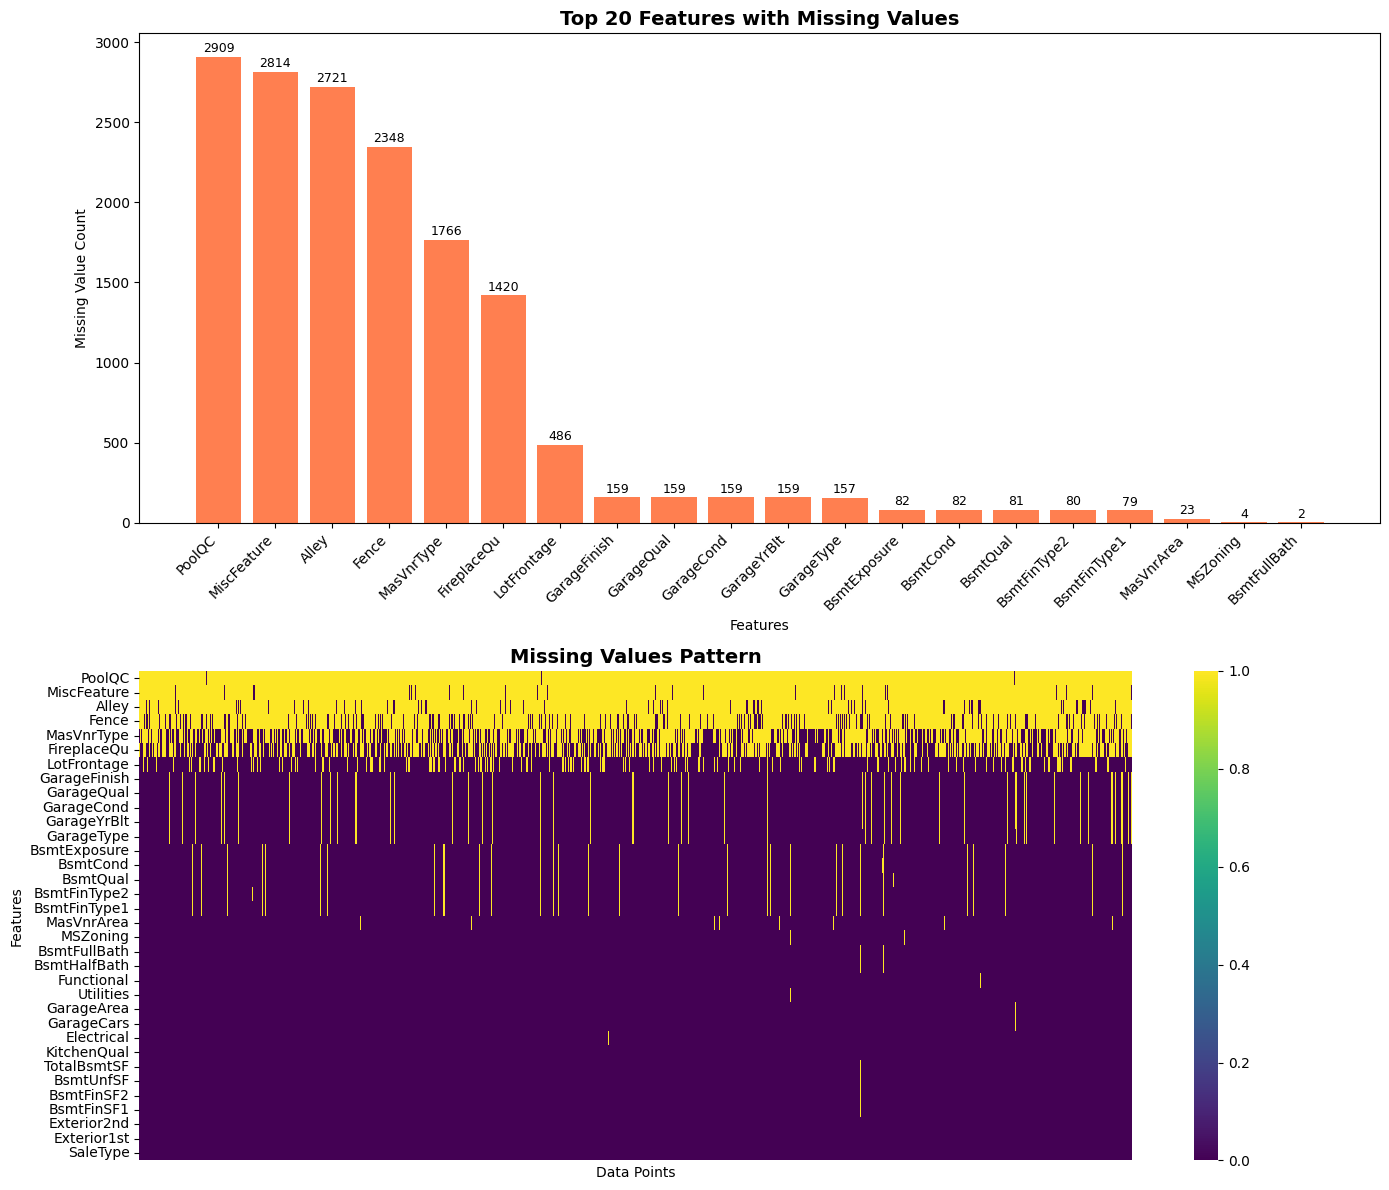

In [181]:
# Create figure with subplots
fig, axes = plt.subplots(2, 1, figsize=(14, 12))

# Bar plot of missing values per column
missing_counts = df_combined.isnull().sum()
missing_counts = missing_counts[missing_counts > 0].sort_values(ascending=False)

# Plot top 20 features with missing values
top_missing = missing_counts.head(20)
ax1 = axes[0]
bars = ax1.bar(range(len(top_missing)), top_missing.values, color='coral')
ax1.set_title('Top 20 Features with Missing Values', fontsize=14, fontweight='bold')
ax1.set_xlabel('Features')
ax1.set_ylabel('Missing Value Count')
ax1.set_xticks(range(len(top_missing)))
ax1.set_xticklabels(top_missing.index, rotation=45, ha='right')

# Add value labels on bars
for bar, value in zip(bars, top_missing.values):
    ax1.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 10,
             f'{value}', ha='center', va='bottom', fontsize=9)

# Heatmap of missing values pattern (subset of features)
ax2 = axes[1]
# Select features with missing values for heatmap
missing_features = missing_counts.index.tolist()
missing_data = df_combined[missing_features].isnull()

# Create heatmap
sns.heatmap(missing_data.T, cbar=True, cmap='viridis', 
            ax=ax2, xticklabels=False, yticklabels=True)
ax2.set_title('Missing Values Pattern', fontsize=14, fontweight='bold')
ax2.set_xlabel('Data Points')
ax2.set_ylabel('Features')

plt.tight_layout()
plt.show()

#### Missing Analysis:
  - Low overall missing data rate (~6.6%) with most concentrated in optional features
  - High missingness in luxury features (pools 99.7%, fireplaces 48.6%) reflects feature rarity
  - Garage and basement features show clustered missing patterns suggesting systematic data collection issues
  - Core structural features generally complete with 48 features having no missing values

## 3. Target Variable Analysis

### 3.1 SalePrice Distribution Analysis

Analyze the distribution of the target variable `SalePrice` in the training dataset.

In [182]:
target = 'SalePrice'

# Normality test
shapiro_stat, shapiro_p = stats.shapiro(df_train[target])

# Analyze the distribution of the target variable
target_stats = {
    'Mean': df_train[target].mean(),
    'Median': df_train[target].median(),
    'Mode': df_train[target].mode()[0],
    'Std Dev': df_train[target].std(),
    'Variance': df_train[target].var(),
    'Min': df_train[target].min(),
    'Max': df_train[target].max(),
    'Range': df_train[target].max() - df_train[target].min(),
    'Skewness': df_train[target].skew(),
    'Kurtosis': df_train[target].kurtosis(),
    'Shapiro-Wilk Stat': shapiro_stat,
    'Shapiro-Wilk p-value': shapiro_p
}

# Create summary dataframe
summary = pd.DataFrame(target_stats, index=[0]).T
summary.columns = [target]

# Format numbers nicely
summary[target] = summary[target].apply(
    lambda x: f"{x:,.3f}" if isinstance(x, float) and abs(x) < 10 else f"{x:,.0f}"
)

summary




,SalePrice
Mean,"180,921"
Median,"163,000"
Mode,"140,000"
Std Dev,"79,443"
Variance,"6,311,111,264"
Min,"34,900"
Max,"755,000"
Range,"720,100"
Skewness,1.883
Kurtosis,6.536


Strong right-skewed distribution with skewness = 1.88 and heavy tails (kurtosis = 6.54). The Mean-Median-Mode relationship ($181k > $163k > $140k)
confirms positive skew with high-price outliers pulling the mean upward by $18k from median. High variance and 20x price range ($35k-$755k) indicate diverse housing market from affordable to luxury segments. Non-normal distribution will likely benefit from log transformation for modeling. The Shapiro-Wilk Stat = 0.87 and p-value < 0.05 confirms non-normality.

#### SalePrice Distribution Plots
Visual analysis of target variable distribution, skewness, and normality assessment.

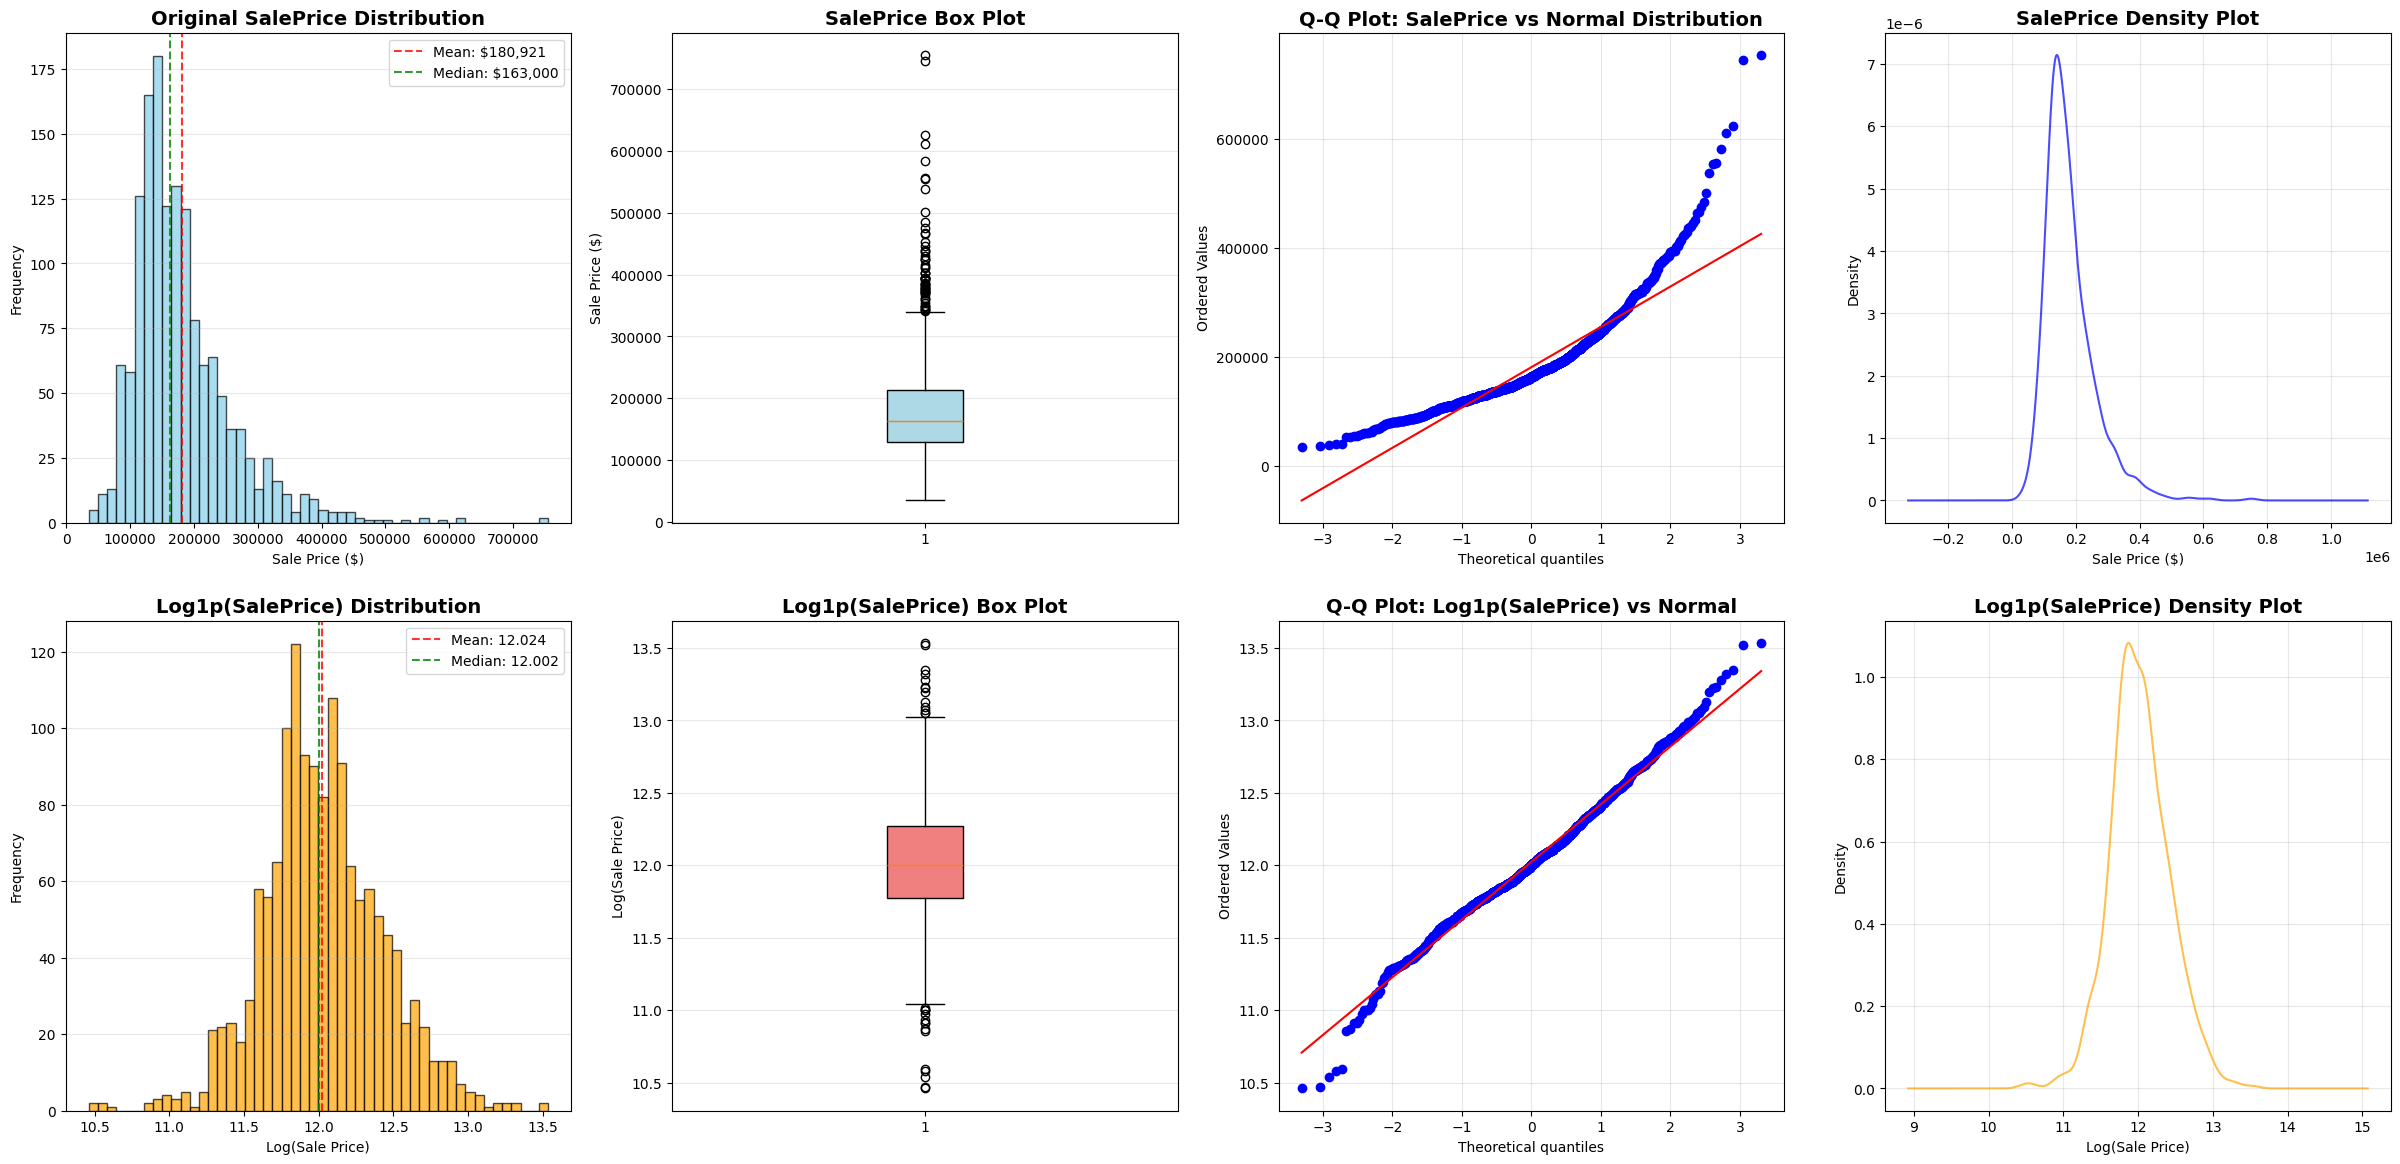

In [183]:
# Visualization comparing original and log-transformed distributions
target_variable = 'SalePrice'
fig, axes = plt.subplots(2, 4, figsize=(30, 14))

# Original SalePrice analysis (Row 1)
# Histogram
axes[0,0].hist(df_train[target_variable], bins=50, edgecolor='black', alpha=0.7, color='skyblue')
axes[0,0].set_title('Original SalePrice Distribution', fontsize=14, fontweight='bold')
axes[0,0].set_xlabel('Sale Price ($)')
axes[0,0].set_ylabel('Frequency')
axes[0,0].grid(axis='y', alpha=0.3)

# Add vertical lines for mean and median
axes[0,0].axvline(target_stats['Mean'], color='red', linestyle='--', alpha=0.8, label=f"Mean: ${target_stats['Mean']:,.0f}")
axes[0,0].axvline(target_stats['Median'], color='green', linestyle='--', alpha=0.8, label=f"Median: ${target_stats['Median']:,.0f}")
axes[0,0].legend()

# Box plot
box_plot = axes[0,1].boxplot(df_train[target_variable], patch_artist=True)
box_plot['boxes'][0].set_facecolor('lightblue')
axes[0,1].set_title('SalePrice Box Plot', fontsize=14, fontweight='bold')
axes[0,1].set_ylabel('Sale Price ($)')
axes[0,1].grid(axis='y', alpha=0.3)

# Q-Q plot against normal distribution
scipy.stats.probplot(df_train[target_variable], dist="norm", plot=axes[0,2])
axes[0,2].set_title('Q-Q Plot: SalePrice vs Normal Distribution', fontsize=14, fontweight='bold')
axes[0,2].grid(alpha=0.3)

# Density plot
df_train[target_variable].plot(kind='density', ax=axes[0,3], color='blue', alpha=0.7)
axes[0,3].set_title('SalePrice Density Plot', fontsize=14, fontweight='bold')
axes[0,3].set_xlabel('Sale Price ($)')
axes[0,3].set_ylabel('Density')
axes[0,3].grid(alpha=0.3)

# Log-transformed SalePrice analysis (Row 2)
log_target = np.log1p(df_train[target_variable])

log_stats = {
    'Mean': log_target.mean(),
    'Median': log_target.median(),
    'Std': log_target.std(),
    'Skewness': log_target.skew(),
    'Kurtosis': log_target.kurtosis()
}

# Log histogram
axes[1,0].hist(log_target, bins=50, edgecolor='black', alpha=0.7, color='orange')
axes[1,0].set_title('Log1p(SalePrice) Distribution', fontsize=14, fontweight='bold')
axes[1,0].set_xlabel('Log(Sale Price)')
axes[1,0].set_ylabel('Frequency')
axes[1,0].grid(axis='y', alpha=0.3)

# Add vertical lines for log mean and median
axes[1,0].axvline(log_stats['Mean'], color='red', linestyle='--', alpha=0.8, label=f"Mean: {log_stats['Mean']:.3f}")
axes[1,0].axvline(log_stats['Median'], color='green', linestyle='--', alpha=0.8, label=f"Median: {log_stats['Median']:.3f}")
axes[1,0].legend()

# Log box plot
log_box_plot = axes[1,1].boxplot(log_target, patch_artist=True)
log_box_plot['boxes'][0].set_facecolor('lightcoral')
axes[1,1].set_title('Log1p(SalePrice) Box Plot', fontsize=14, fontweight='bold')
axes[1,1].set_ylabel('Log(Sale Price)')
axes[1,1].grid(axis='y', alpha=0.3)

# Log Q-Q plot
stats.probplot(log_target, dist="norm", plot=axes[1,2])
axes[1,2].set_title('Q-Q Plot: Log1p(SalePrice) vs Normal', fontsize=14, fontweight='bold')
axes[1,2].grid(alpha=0.3)
axes[1,2].grid(alpha=0.3)

# Log density plot
log_target.plot(kind='density', ax=axes[1,3], color='orange', alpha=0.7)
axes[1,3].set_title('Log1p(SalePrice) Density Plot', fontsize=14, fontweight='bold')
axes[1,3].set_xlabel('Log(Sale Price)')
axes[1,3].set_ylabel('Density')
axes[1,3].grid(alpha=0.3)



Log1p transformation improves distribution normality. Original SalePrice shows right skew with tail extending to $700k+ and density concentrated
around $150-200k. The Q-Q plot curves away from the normal line, particularly at high values. After log1p transformation, the distribution becomes more symmetric and bell-shaped. The histogram shows a normal pattern centered around 12.0 (logscale), with mean (12.024) and median (12.002) converging. The Q-Q plot for log-transformed data follows the normal line more closely, with minor
  deviations at extremes.

### 3.2 SalePrice Outlier Analysis

#### Basic IQR Outlier Detection

Use the Interquartile Range method to identify outliers in SalePrice.

In [184]:
# IQR Method for outlier detection
Q1 = df_train['SalePrice'].quantile(0.25)
Q3 = df_train['SalePrice'].quantile(0.75)
IQR = Q3 - Q1
iqr_lower = Q1 - 1.5 * IQR
iqr_upper = Q3 + 1.5 * IQR

iqr_outliers = df_train[(df_train['SalePrice'] < iqr_lower) | (df_train['SalePrice'] > iqr_upper)]

low_outliers = df_train[df_train['SalePrice'] < iqr_lower]
high_outliers = df_train[df_train['SalePrice'] > iqr_upper]


print(f"IQR Outlier Detection:")
print(f"Lower bound: ${iqr_lower:,.0f}")
print(f"Upper bound: ${iqr_upper:,.0f}")
print(f"Low outliers: {len(low_outliers)}, High outliers: {len(high_outliers)}")
print(f"Outliers detected: {len(iqr_outliers)} ({len(iqr_outliers)/len(df_train)*100:.1f}%)")

IQR Outlier Detection:
Lower bound: $3,938
Upper bound: $340,038
Low outliers: 0, High outliers: 61
Outliers detected: 61 (4.2%)


All 61 outliers (4.2%) are high-priced homes above $340k. No low-price outliers below $3,938, confirming right-skewed distribution pattern.

#### Log Transformed IQR Outlier Detection


In [185]:
# Log-transform SalePrice
log_price = np.log1p(df_train['SalePrice'])

# IQR on log-transformed data
Q1_log = log_price.quantile(0.25)
Q3_log = log_price.quantile(0.75)
IQR_log = Q3_log - Q1_log
iqr_lower_log = Q1_log - 1.5 * IQR_log
iqr_upper_log = Q3_log + 1.5 * IQR_log

# Mask for outliers (in log space)
log_outlier_mask = (log_price < iqr_lower_log) | (log_price > iqr_upper_log)

# Apply mask to original dataframe
iqr_log_outliers = df_train[log_outlier_mask]

# Separate low/high
low_log_outliers = df_train[log_price < iqr_lower_log]
high_log_outliers = df_train[log_price > iqr_upper_log]

# Inverse transform for bounds
lower_bound_dollars = np.expm1(iqr_lower_log)
upper_bound_dollars = np.expm1(iqr_upper_log)

# Print results
print("Log-transformed IQR Outlier Detection:")
print(f"Lower bound: ${lower_bound_dollars:,.0f}")
print(f"Upper bound: ${upper_bound_dollars:,.0f}")
print(f"Low outliers: {len(low_log_outliers)}, High outliers: {len(high_log_outliers)}")
print(f"Outliers detected: {len(iqr_log_outliers)} ({len(iqr_log_outliers)/len(df_train)*100:.1f}%)")

Log-transformed IQR Outlier Detection:
Lower bound: $61,522
Upper bound: $452,110
Low outliers: 15, High outliers: 13
Outliers detected: 28 (1.9%)


Log transformation normalizes price distribution, detecting 28 outliers 1.9% with more balanced identification of extreme low and high values
compared to standard IQR method.

## 4. Feature Relationships Exploration
Explore correlations to understand feature impact and detect multicollinearity.

### 4.1 Pearson Correlation Matrix
Calculate correlations between numerical features and SalePrice to identify key drivers.

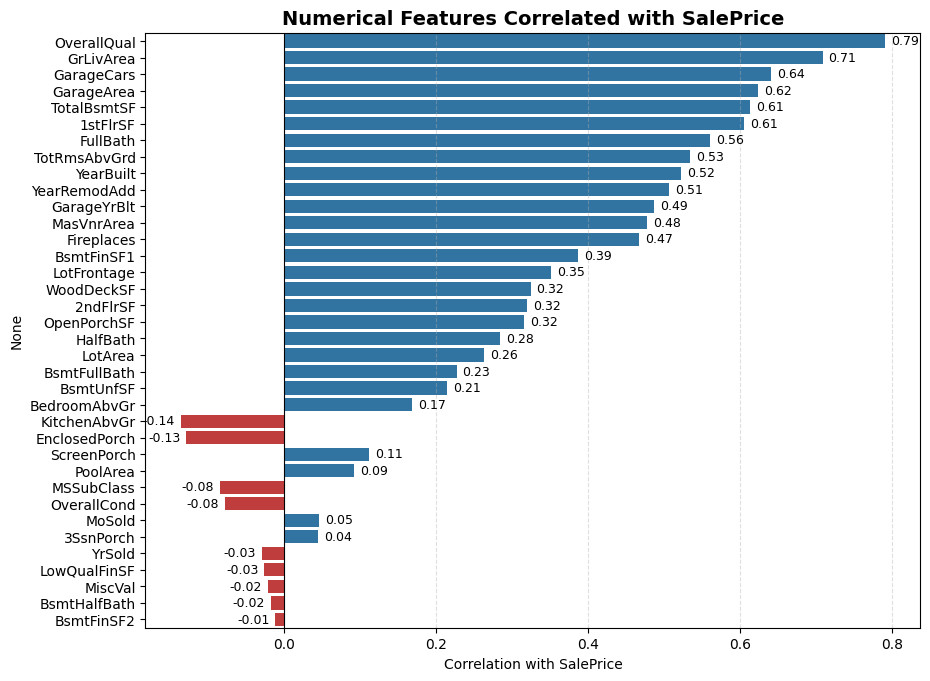

In [189]:
# Select numerical features and remove ID 
numerical_features = df_train.select_dtypes(include=[np.number]).columns.tolist()
if 'Id' in numerical_features:
    numerical_features.remove('Id')

# Compute correlation matrix
correlation_matrix = df_train[numerical_features].corr()

# Extract correlations with SalePrice, sorted by absolute value
target_correlations = correlation_matrix['SalePrice'].drop('SalePrice').sort_values(key=abs, ascending=False)

colors = ['#1f77b4' if val > 0 else '#d62728' for val in target_correlations.values]

# Visualization
fig, ax = plt.subplots(figsize=(10, 7))

sns.barplot(
    x=target_correlations.values,
    y=target_correlations.index,
    hue=target_correlations.index,
    palette=colors,
    dodge=False,
    legend=False,
    ax=ax
)

# Add value labels to bars
for i, bar in enumerate(ax.patches):
    width = bar.get_width()
    offset = 0.01 * max(abs(target_correlations.values))
    ax.text(
        width + offset if width > 0 else width - offset,
        bar.get_y() + bar.get_height() / 2,
        f"{target_correlations.iloc[i]:.2f}",
        va='center',
        ha='left' if width > 0 else 'right',
        fontsize=9,
        color='black'
    )

# Style plot
ax.set_xlabel("Correlation with SalePrice")
ax.set_title("Numerical Features Correlated with SalePrice", fontsize=14, weight='bold')
ax.grid(axis='x', linestyle='--', alpha=0.4)
ax.axvline(0, color='black', linestyle='-', linewidth=0.8)
plt.subplots_adjust(top=0.95, bottom=0.1)
plt.show()



**Strongest predictors:** OverallQual (0.79), GrLivArea (0.71), and garage features (0.62-0.64) dominate.

**Key insight:** Quality beats size - OverallQual is the strongest predictor, while area features (basement, floors) cluster around 0.5-0.6.

**Negative correlations:** KitchenAbvGr (-0.14) and EnclosedPorch (-0.13) suggest multiple kitchens and enclosed porches reduce value.

**Weak features:** Condition variables and SubClass show minimal correlation with SalePrice.

### 4.2 Categorical Features vs SalePrice Analysis

Investigate relationship patterns between categorical features and SalePrice using boxplot visualization to identify discriminative categories.

Total categorical features for analysis: 46
Features: ['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual', 'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature', 'SaleType', 'SaleCondition', 'OverallQual', 'OverallCond', 'MSSubClass']

MSZoning - Mean SalePrice by Category:
  FV: $214,014 (n=65)
  RL: $191,005 (n=1151)
  RH: $131,558 (n=16)
  RM: $126,317 (n=218)
  C (all): $74,528 (n=10)

Street - Mean SalePrice by Category:
  Pave: $181,131 (n=1454)
  Grvl: $130,190 (n=6)

Alley - Mean SalePrice by Category:
  Pave: $168,001 (n=41)
  Grvl: $122,219 

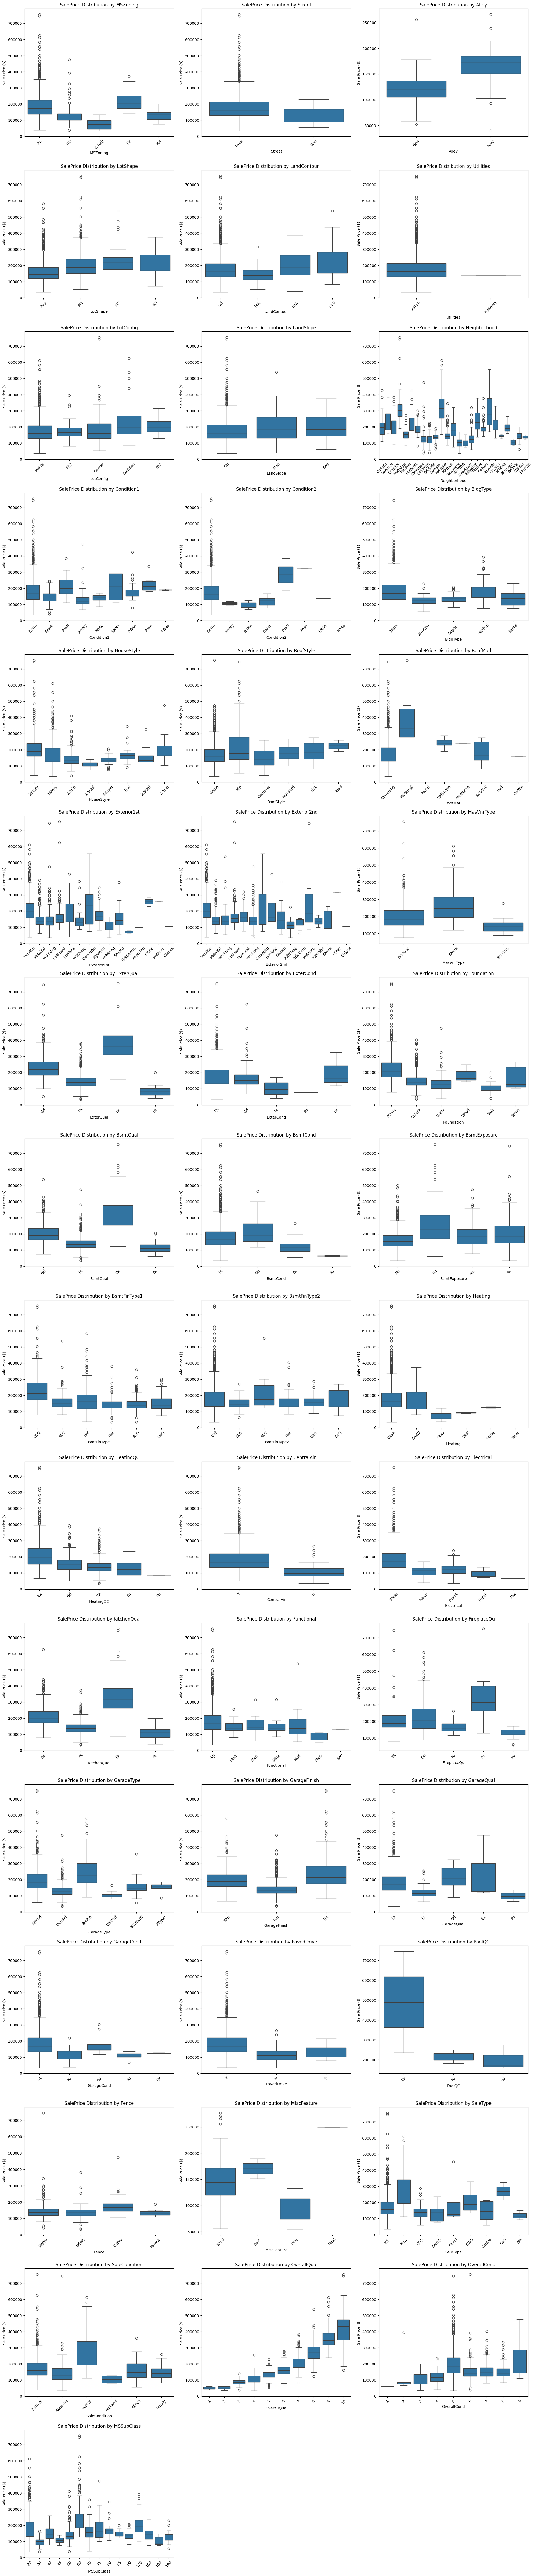

In [193]:
# Get all categorical features (object dtype)
categorical_features = df_train.select_dtypes(include=['object']).columns.tolist()

# Add numerical features that represent categories
numerical_categories = ['OverallQual', 'OverallCond', 'MSSubClass']
categorical_features.extend(numerical_categories)

# Remove Id if present (not a meaningful category)
if 'Id' in categorical_features:
    categorical_features.remove('Id')

print(f"Total categorical features for analysis: {len(categorical_features)}")
print(f"Features: {categorical_features}")

# Calculate subplot grid for all categorical features
n_features = len(categorical_features)
n_cols = 3
n_rows = (n_features + n_cols - 1) // n_cols  # Ceiling division

# Create subplots for all categorical features
fig, axes = plt.subplots(n_rows, n_cols, figsize=(20, 6*n_rows))
axes = axes.ravel()

for i, feature in enumerate(categorical_features):
    # Create boxplot for each categorical feature vs SalePrice
    sns.boxplot(data=df_train, x=feature, y='SalePrice', ax=axes[i])
    axes[i].set_title(f'SalePrice Distribution by {feature}')
    axes[i].set_xlabel(feature)
    axes[i].set_ylabel('Sale Price ($)')
    axes[i].tick_params(axis='x', rotation=45)

    # Calculate and display mean prices by category
    category_means = df_train.groupby(feature)['SalePrice'].mean().sort_values(ascending=False)
    print(f"\n{feature} - Mean SalePrice by Category:")
    for category, mean_price in category_means.head(5).items():
        count = df_train[df_train[feature] == category].shape[0]
        print(f"  {category}: ${mean_price:,.0f} (n={count})")

# Hide any unused subplots
for j in range(i+1, len(axes)):
    axes[j].set_visible(False)

plt.tight_layout()
plt.show()

**Categorical Feature Analysis Results:**
- **Quality features** (OverallQual, ExterQual, KitchenQual) show clear step-wise price increases from poor to excellent ratings
- **Neighborhood** displays the widest price spreads - some neighborhoods consistently command $100k+ premiums
- **Foundation type** shows concrete foundations outperform other materials significantly
- **Heating systems** demonstrate clear performance hierarchy with forced air systems leading
- **Garage features** reveal substantial price impacts based on type and quality

**Key findings:**
- **Ordinal relationships** dominate quality variables - higher ratings = higher prices
- **Location effects** are strong - neighborhood alone can double/halve property values
- **Structural choices** matter - foundation, heating, and garage decisions directly impact value
- **Binary features** like CentralAir show clear value differentiation

Analyzing correlations for 34 true numerical features


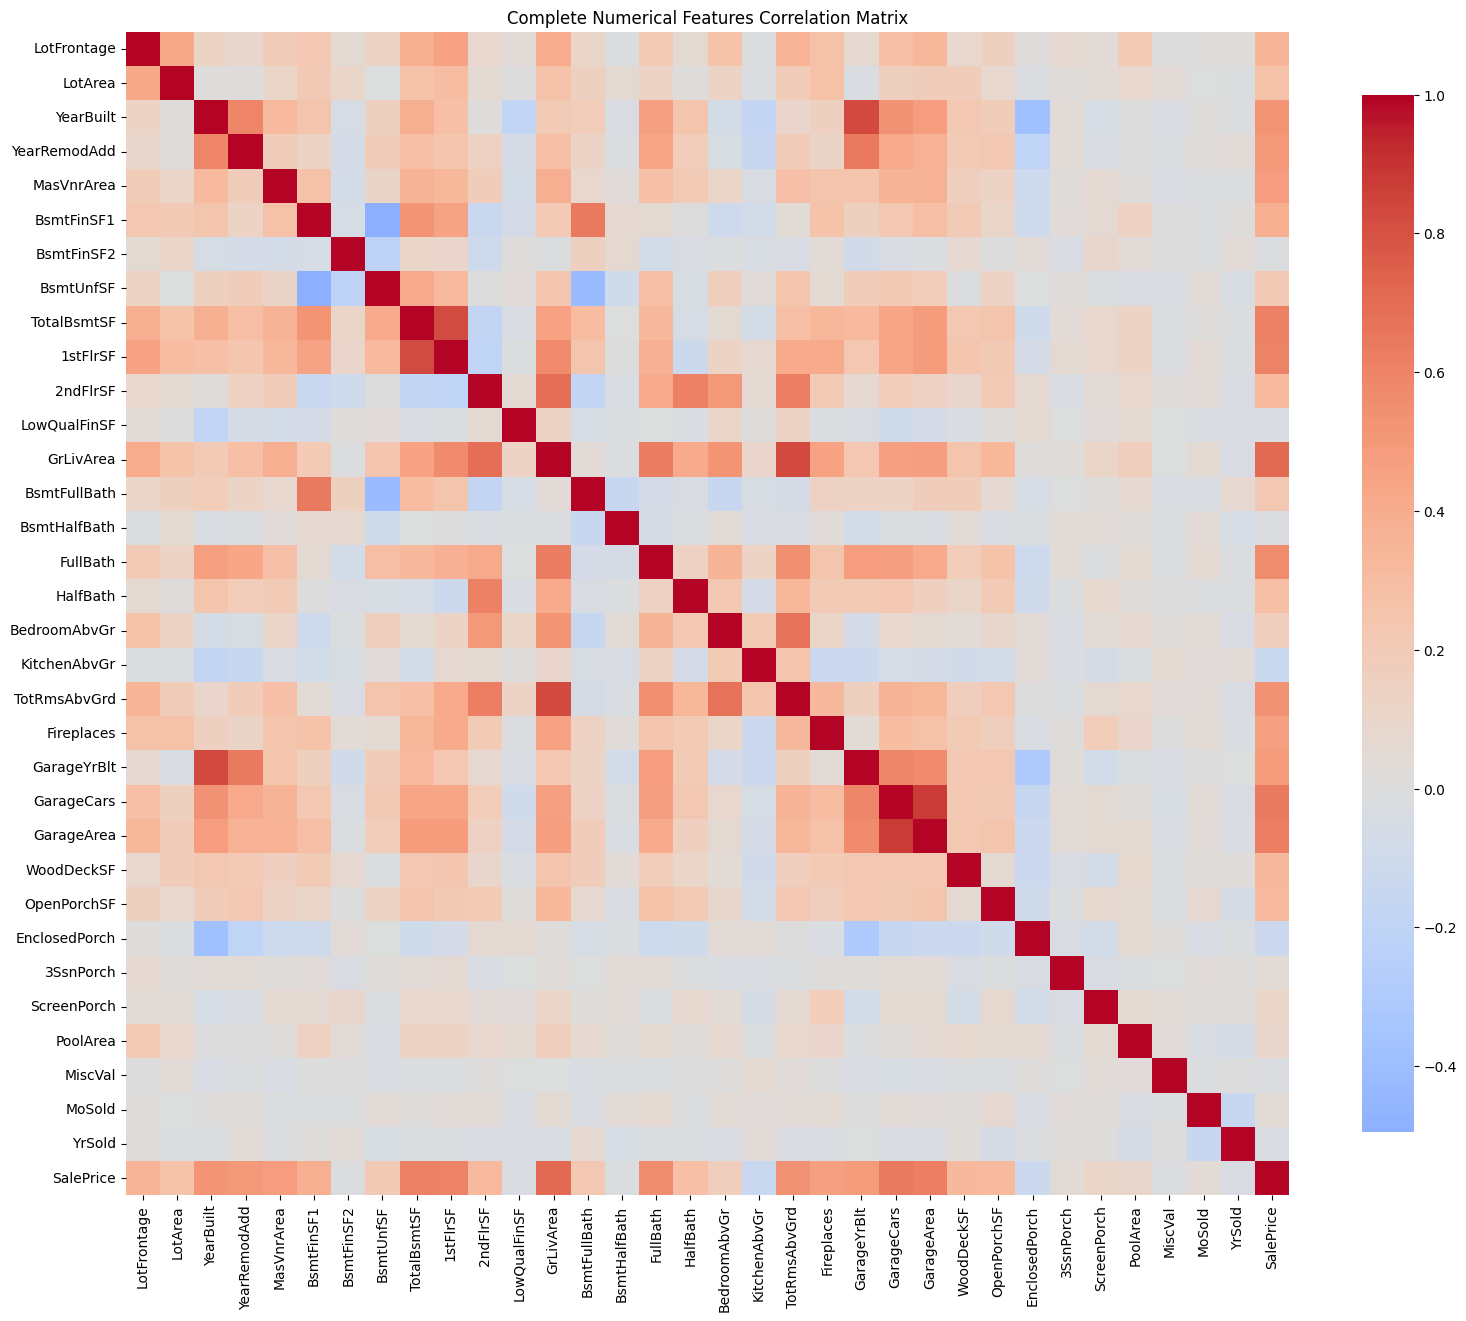

High Correlations (>0.7) - Ranked by Strength:
GarageCars vs GarageArea: 0.882
YearBuilt vs GarageYrBlt: 0.826
GrLivArea vs TotRmsAbvGrd: 0.825
TotalBsmtSF vs 1stFlrSF: 0.820
GrLivArea vs SalePrice: 0.709


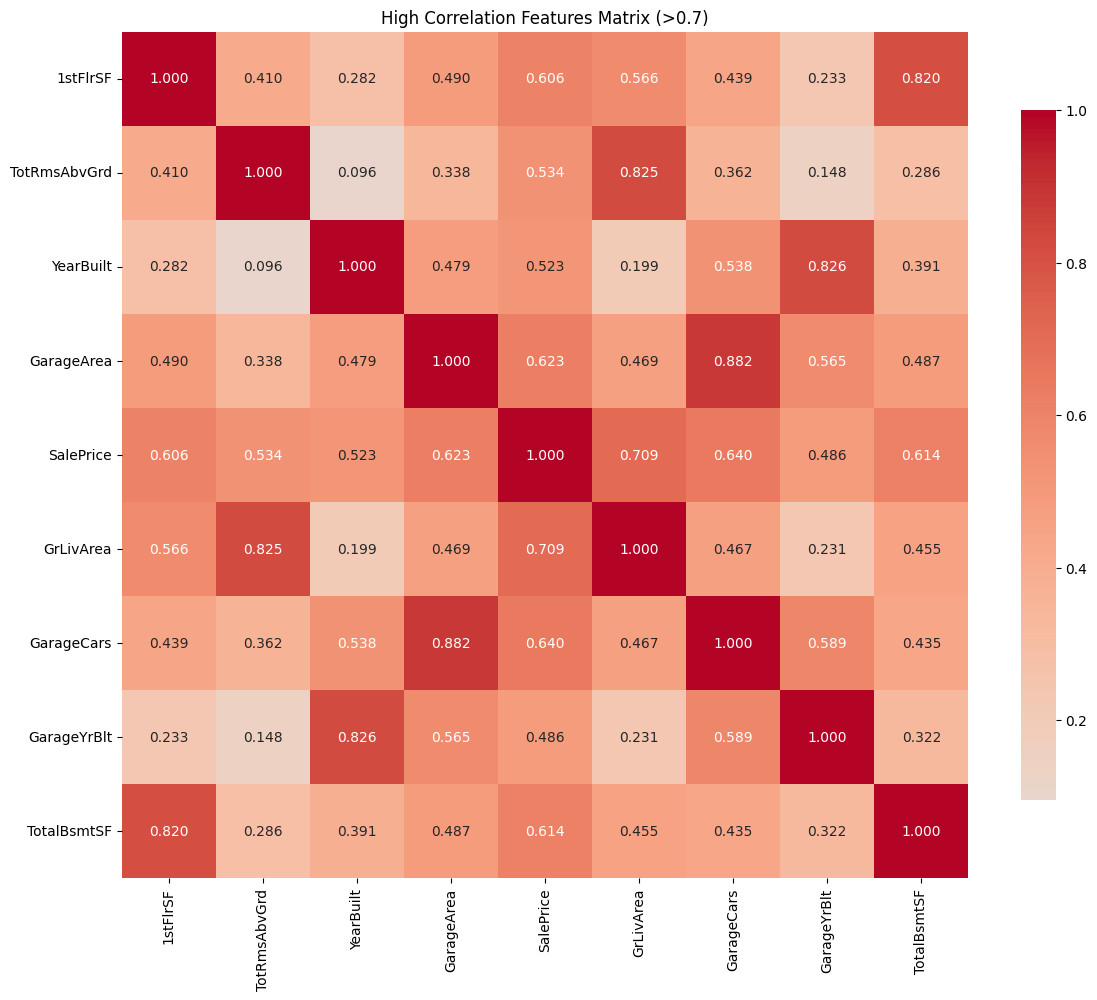


Medium Correlations (0.5-0.7) - Top 10:
2ndFlrSF vs GrLivArea: 0.688
BedroomAbvGr vs TotRmsAbvGrd: 0.677
BsmtFinSF1 vs BsmtFullBath: 0.649
YearRemodAdd vs GarageYrBlt: 0.642
GarageCars vs SalePrice: 0.640
GrLivArea vs FullBath: 0.630
GarageArea vs SalePrice: 0.623
2ndFlrSF vs TotRmsAbvGrd: 0.616
TotalBsmtSF vs SalePrice: 0.614
2ndFlrSF vs HalfBath: 0.610


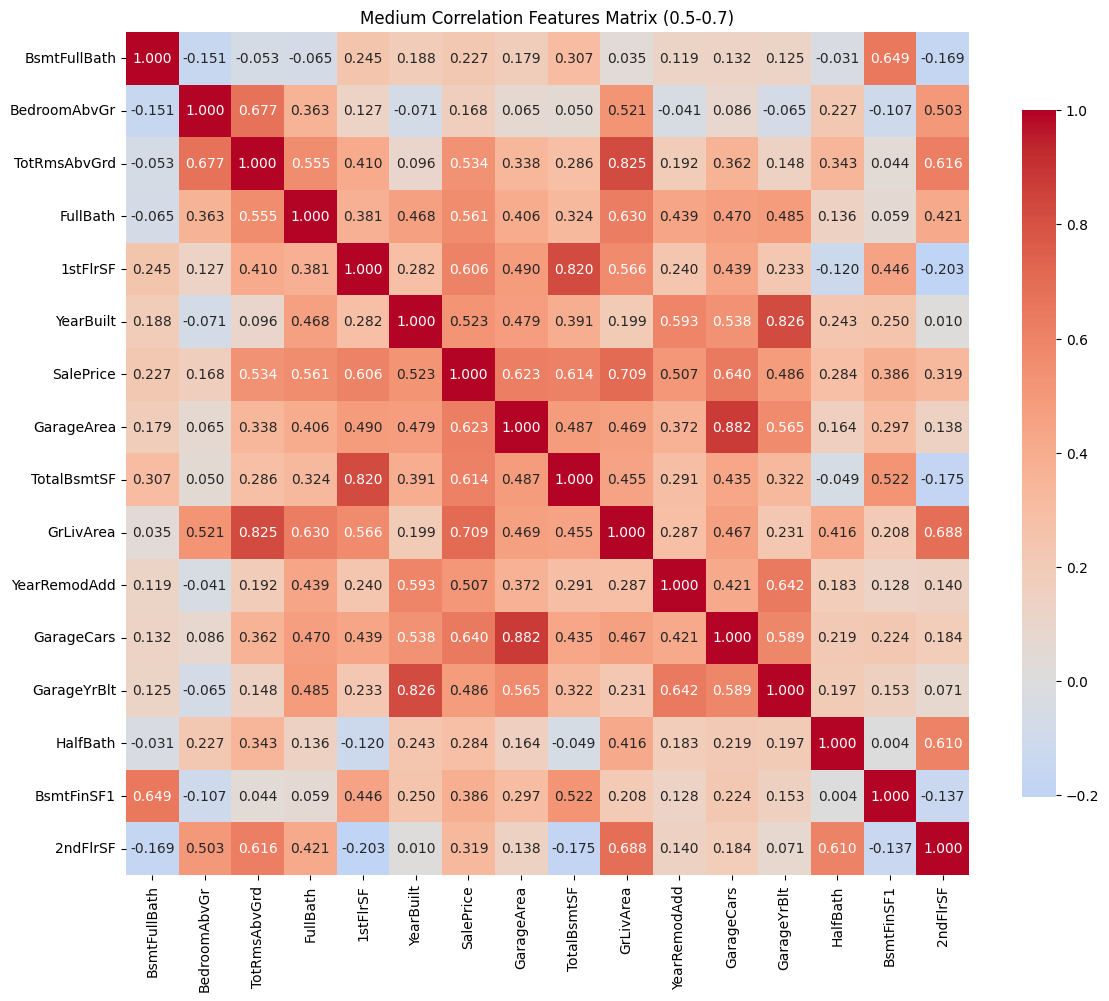

In [197]:
# Calculate full correlation matrix for true numerical features only
numerical_cols = df_train.select_dtypes(include=['int64', 'float64']).columns.tolist()

# Remove non-meaningful numerical features
remove_cols = ['Id', 'OverallQual', 'OverallCond', 'MSSubClass']
for col in remove_cols:
    if col in numerical_cols:
        numerical_cols.remove(col)

print(f"Analyzing correlations for {len(numerical_cols)} true numerical features")
correlation_matrix = df_train[numerical_cols].corr()

# 1. Full correlation matrix visualization
plt.figure(figsize=(16, 14))
sns.heatmap(correlation_matrix, annot=False, cmap='coolwarm', center=0,
            square=True, cbar_kws={"shrink": .8})
plt.title('Complete Numerical Features Correlation Matrix')
plt.tight_layout()
plt.show()

# Find all high correlations (>0.7)
high_correlations = []
for i in range(len(correlation_matrix.columns)):
    for j in range(i+1, len(correlation_matrix.columns)):
        corr_value = correlation_matrix.iloc[i, j]
        if abs(corr_value) > 0.7:
            feature1 = correlation_matrix.columns[i]
            feature2 = correlation_matrix.columns[j]
            high_correlations.append((feature1, feature2, corr_value))

# Sort by correlation strength
high_correlations.sort(key=lambda x: abs(x[2]), reverse=True)

print("High Correlations (>0.7) - Ranked by Strength:")
print("=" * 50)
for feature1, feature2, corr in high_correlations:
    print(f"{feature1} vs {feature2}: {corr:.3f}")

# 2. High correlation features visualization
if high_correlations:
    # Get unique features from high correlation pairs
    high_corr_features = set()
    for feature1, feature2, _ in high_correlations:
        high_corr_features.add(feature1)
        high_corr_features.add(feature2)
    
    high_corr_features = list(high_corr_features)
    high_corr_matrix = df_train[high_corr_features].corr()
    
    # Visualize high correlation features
    plt.figure(figsize=(12, 10))
    sns.heatmap(high_corr_matrix, annot=True, cmap='coolwarm', center=0,
                square=True, fmt='.3f', cbar_kws={"shrink": .8})
    plt.title('High Correlation Features Matrix (>0.7)')
    plt.tight_layout()
    plt.show()
else:
    print("No correlations >0.7 found")

# Find medium correlations (0.5-0.7)
medium_correlations = []
for i in range(len(correlation_matrix.columns)):
    for j in range(i+1, len(correlation_matrix.columns)):
        corr_value = correlation_matrix.iloc[i, j]
        if 0.5 <= abs(corr_value) <= 0.7:
            feature1 = correlation_matrix.columns[i]
            feature2 = correlation_matrix.columns[j]
            medium_correlations.append((feature1, feature2, corr_value))

medium_correlations.sort(key=lambda x: abs(x[2]), reverse=True)

print(f"\nMedium Correlations (0.5-0.7) - Top 10:")
print("=" * 50)
for feature1, feature2, corr in medium_correlations[:10]:
    print(f"{feature1} vs {feature2}: {corr:.3f}")

# 3. Medium correlation features visualization
if medium_correlations:
    # Get unique features from medium correlation pairs (top 15 pairs)
    medium_corr_features = set()
    for feature1, feature2, _ in medium_correlations[:15]:
        medium_corr_features.add(feature1)
        medium_corr_features.add(feature2)
    
    medium_corr_features = list(medium_corr_features)
    medium_corr_matrix = df_train[medium_corr_features].corr()
    
    # Visualize medium correlation features
    plt.figure(figsize=(12, 10))
    sns.heatmap(medium_corr_matrix, annot=True, cmap='coolwarm', center=0,
                square=True, fmt='.3f', cbar_kws={"shrink": .8})
    plt.title('Medium Correlation Features Matrix (0.5-0.7)')
    plt.tight_layout()
    plt.show()
else:
    print("No medium correlations found")

**Multicollinearity Analysis Results:**

**High Correlations (>0.7):**
- **GarageCars vs GarageArea (0.882)** - Strong redundancy between garage capacity measures
- **YearBuilt vs GarageYrBlt (0.826)** - Expected correlation between construction years
- **GrLivArea vs TotRmsAbvGrd (0.825)** - Living area strongly correlates with room count
- **TotalBsmtSF vs 1stFlrSF (0.820)** - Basement and first floor areas are highly related

**Key Findings:**
- **Garage features** show highest multicollinearity
- **Area measurements** are highly correlated - GrLivArea and TotRmsAbvGrd provide similar information
- **Construction years** (YearBuilt/GarageYrBlt) show expected temporal correlation
- **Foundation relationship** between basement and first floor areas requires feature selection

**Feature Selection Implications:**
These high correlations indicate redundant information that can cause instability in linear models. Feature selection should prioritize one feature from each highly correlated pair to reduce multicollinearity while preserving predictive power.

## 2. Target Variable Analysis

Implement statistical analysis pipeline to evaluate target variable distribution characteristics for modeling optimization.
Distribution assessment determines transformation requirements for linear regression algorithms and model performance.


### 2.1 Distribution Characteristics

Examine distribution shape, central tendencies, and spread to identify potential skewness or anomalies.

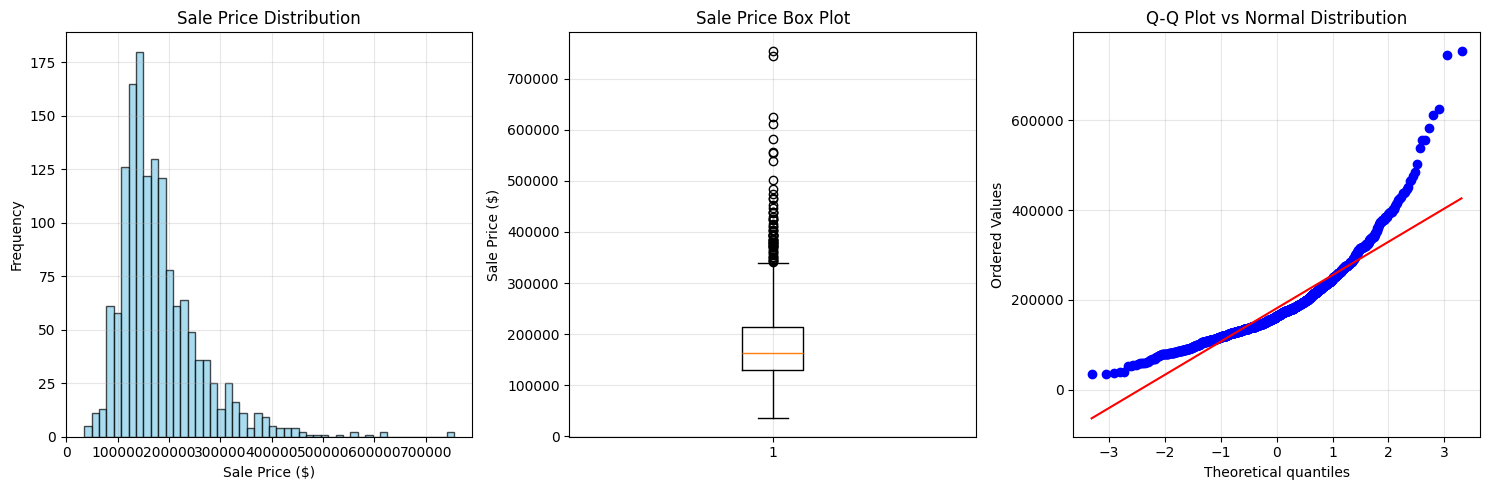

Sale Price Statistical Summary:
count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64


In [ ]:
# First look at SalePrice distribution
plt.figure(figsize=(15, 5))

# Distribution histogram
plt.subplot(1, 3, 1)
plt.hist(df_train['SalePrice'], bins=50, alpha=0.7, color='skyblue', edgecolor='black')
plt.title('Sale Price Distribution')
plt.xlabel('Sale Price ($)')
plt.ylabel('Frequency')
plt.grid(True, alpha=0.3)

# Box plot for outlier identification
plt.subplot(1, 3, 2)
plt.boxplot(df_train['SalePrice'])
plt.title('Sale Price Box Plot')
plt.ylabel('Sale Price ($)')
plt.grid(True, alpha=0.3)

# Q-Q plot for normality assessment
plt.subplot(1, 3, 3)
from scipy import stats
stats.probplot(df_train['SalePrice'], dist="norm", plot=plt)
plt.title('Q-Q Plot vs Normal Distribution')
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# Basic statistical summary
print("Sale Price Statistical Summary:")
print(df_train['SalePrice'].describe())

Distribution plots reveal right-skewed target variable with heavy tail indicating transformation requirement for linear models.
Q-Q plot analysis shows significant normality violations requiring log transformation implementation for optimal regression performance.

In [ ]:
# Calculate skewness and assess transformation need
skewness = df_train['SalePrice'].skew()
kurtosis = df_train['SalePrice'].kurtosis()

print(f"Distribution Shape Analysis:")
print(f"Skewness: {skewness:.4f}")
print(f"Kurtosis: {kurtosis:.4f}")

# Interpret skewness level
if abs(skewness) < 0.5:
    interpretation = "approximately symmetric"
elif abs(skewness) < 1:
    interpretation = "moderately skewed" 
else:
    interpretation = "highly skewed"

print(f"Distribution is {interpretation}")
print(f"Mean vs Median: ${df_train['SalePrice'].mean():.0f} vs ${df_train['SalePrice'].median():.0f}")

# Check if transformation testing is warranted
if abs(skewness) > 0.5:
    print(f"\nSkewness level ({skewness:.4f}) suggests log transformation testing is warranted")
else:
    print(f"\nSkewness level ({skewness:.4f}) indicates transformation may not be necessary")

Distribution Shape Analysis:
Skewness: 1.8829
Kurtosis: 6.5363
Distribution is highly skewed
Mean vs Median: $180921 vs $163000

Skewness level (1.8829) suggests log transformation testing is warranted


Skewness calculation returns 1.8829 exceeding threshold for linear model assumptions requiring transformation pipeline.
Mean-median divergence ($180,921 vs $163,000) confirms right-skew distribution impacting regression algorithm performance.

### 2.2 Transformation Assessment

Implement log transformation pipeline to normalize right-skewed price distribution for linear modeling optimization.
Log1p transformation function handles zero values while converting multiplicative price relationships into additive patterns.


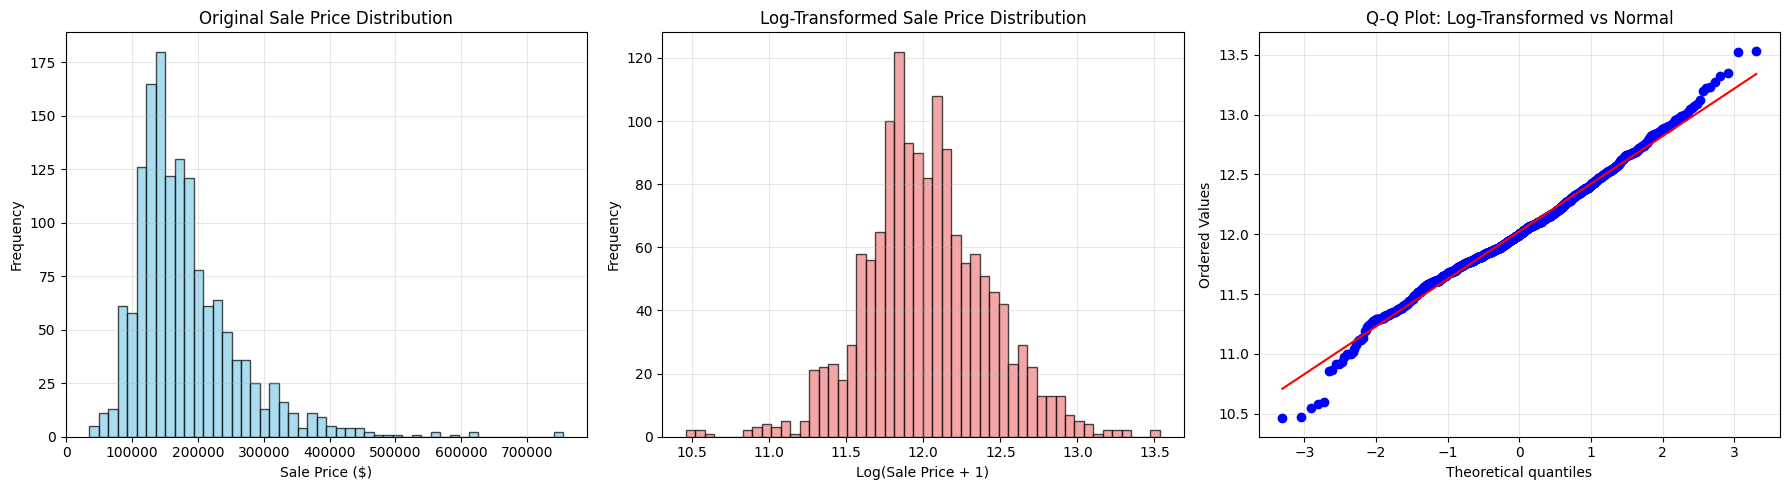

Transformation Effectiveness:
Original Skewness: 1.8829 → Log Skewness: 0.1213
Original Kurtosis: 6.5363 → Log Kurtosis: 0.8095
Skewness improvement: 1.7615


In [ ]:
# Test log transformation based on skewness findings
# Apply log transformation
log_prices = np.log1p(df_train['SalePrice'])

# Compare original vs transformed distributions
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

# Original distribution
axes[0].hist(df_train['SalePrice'], bins=50, alpha=0.7, color='skyblue', edgecolor='black')
axes[0].set_title('Original Sale Price Distribution')
axes[0].set_xlabel('Sale Price ($)')
axes[0].set_ylabel('Frequency')
axes[0].grid(True, alpha=0.3)

# Log-transformed distribution
axes[1].hist(log_prices, bins=50, alpha=0.7, color='lightcoral', edgecolor='black')
axes[1].set_title('Log-Transformed Sale Price Distribution')
axes[1].set_xlabel('Log(Sale Price + 1)')
axes[1].set_ylabel('Frequency')
axes[1].grid(True, alpha=0.3)

# Q-Q plot comparison for log-transformed data
stats.probplot(log_prices, dist="norm", plot=axes[2])
axes[2].set_title('Q-Q Plot: Log-Transformed vs Normal')
axes[2].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# Compare transformation effectiveness
log_skewness = log_prices.skew()
log_kurtosis = log_prices.kurtosis()

print("Transformation Effectiveness:")
print(f"Original Skewness: {skewness:.4f} → Log Skewness: {log_skewness:.4f}")
print(f"Original Kurtosis: {kurtosis:.4f} → Log Kurtosis: {log_kurtosis:.4f}")
print(f"Skewness improvement: {abs(skewness) - abs(log_skewness):.4f}")

Log transformation reduces skewness from 1.8829 to 0.1213 achieving near-normal distribution characteristics.
Q-Q plot linearity improvement validates log transformation effectiveness for linear regression algorithm optimization.

Target variable transformation pipeline validated: log1p function implementation required for preprocessing stage.

## 4. Feature Relationship Exploration

Execute correlation analysis pipeline to identify predictive relationships and multicollinearity patterns for feature engineering optimization.
Statistical analysis determines feature importance hierarchy and detects redundant variables requiring selection algorithms.

### 4.1 Correlation Analysis

Implement correlation matrix calculation for numerical features targeting strongest predictive relationships with SalePrice.
Analysis pipeline ranks feature importance and identifies primary drivers for subsequent model development priorities.

Top 15 Numerical Features Correlated with SalePrice:
OverallQual: 0.7910
GrLivArea: 0.7086
GarageCars: 0.6404
GarageArea: 0.6234
TotalBsmtSF: 0.6136
1stFlrSF: 0.6059
FullBath: 0.5607
TotRmsAbvGrd: 0.5337
YearBuilt: 0.5229
YearRemodAdd: 0.5071
GarageYrBlt: 0.4864
MasVnrArea: 0.4775
Fireplaces: 0.4669
BsmtFinSF1: 0.3864
LotFrontage: 0.3518


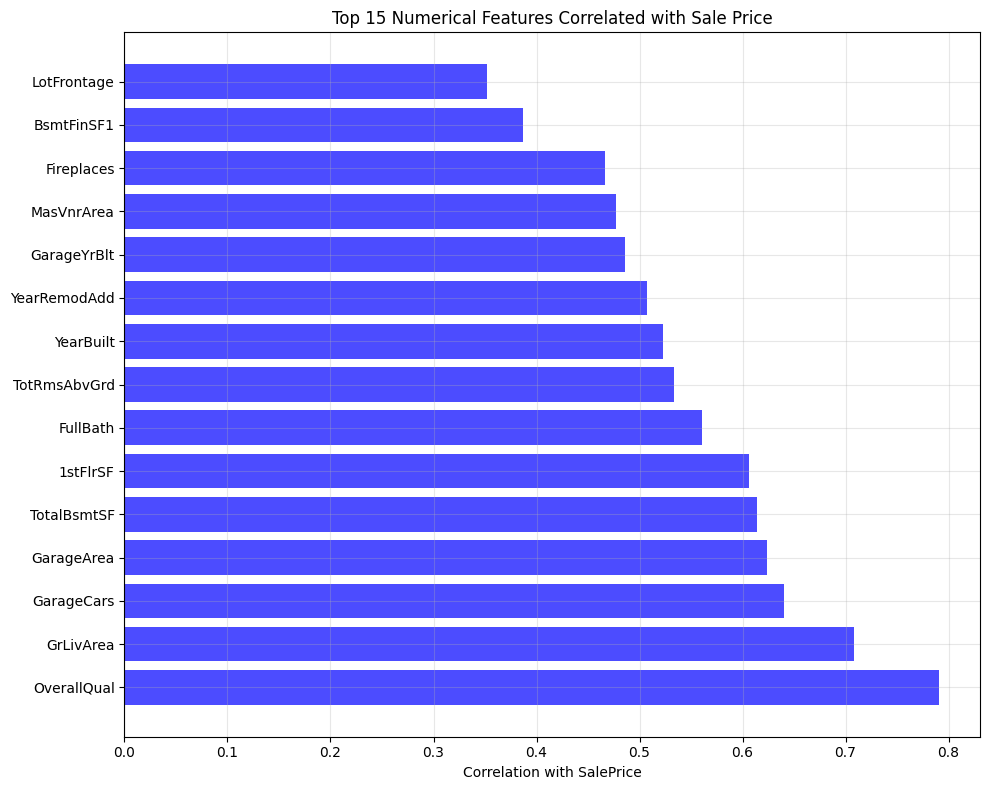

In [ ]:
# Calculate correlations between numerical features and target variable
numerical_features = df_train.select_dtypes(include=[np.number]).columns.tolist()
numerical_features.remove('Id')  # Remove ID column

# Calculate correlation matrix for numerical features
correlation_matrix = df_train[numerical_features].corr()

# Extract correlations with SalePrice
target_correlations = correlation_matrix['SalePrice'].drop('SalePrice').sort_values(key=abs, ascending=False)

print("Top 15 Numerical Features Correlated with SalePrice:")
for feature, corr in target_correlations.head(15).items():
    print(f"{feature}: {corr:.4f}")

# Visualize top correlations
plt.figure(figsize=(10, 8))
top_correlations = target_correlations.head(15)
colors = ['red' if x < 0 else 'blue' for x in top_correlations.values]
bars = plt.barh(range(len(top_correlations)), top_correlations.values, color=colors, alpha=0.7)
plt.yticks(range(len(top_correlations)), top_correlations.index)
plt.xlabel('Correlation with SalePrice')
plt.title('Top 15 Numerical Features Correlated with Sale Price')
plt.grid(True, alpha=0.3)
plt.axvline(x=0, color='black', linestyle='-', alpha=0.3)
plt.tight_layout()
plt.show()


Correlation ranking identifies OverallQual as dominant predictor (r=0.7910) followed by GrLivArea (r=0.7086) establishing feature importance hierarchy.
Analysis confirms quality ratings and area measurements as primary predictive variables for model development prioritization.

### 4.2 Feature Group Analysis

Investigate related feature groups (garage, basement, etc.) based on missing data patterns discovered in Section 3 to understand coordinated feature relationships.Execute grouped correlation analysis for architectural feature clusters to detect multicollinearity patterns within related variables.
Heatmap visualization identifies redundant feature relationships requiring selection algorithms to prevent model instability.


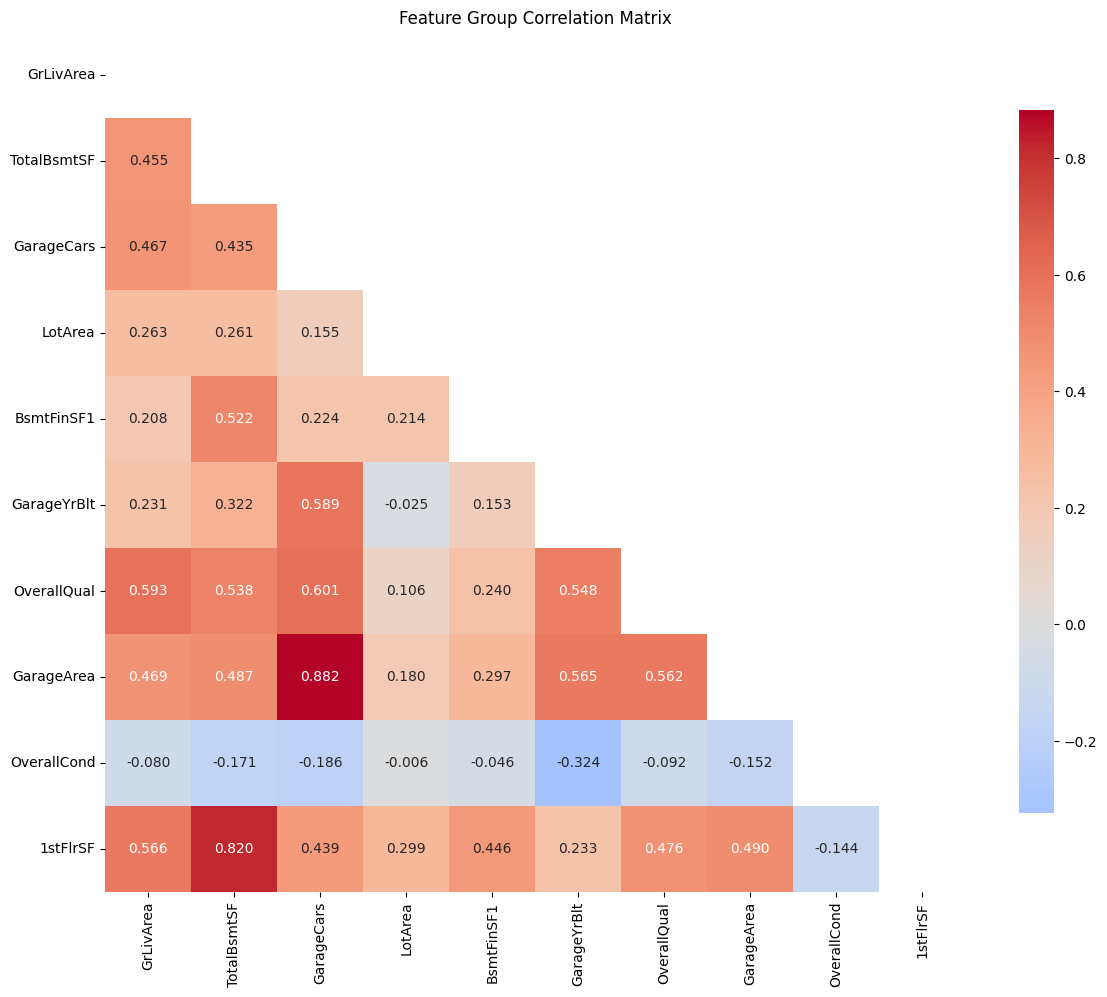

High Correlations Within Feature Groups (>0.7):
TotalBsmtSF vs 1stFlrSF: 0.820
GarageCars vs GarageArea: 0.882


In [ ]:
# Examine correlations within related feature groups identified in missing data analysis
# Define feature groups based on Section 3 findings
garage_features = ['GarageArea', 'GarageCars', 'GarageYrBlt']
basement_features = ['TotalBsmtSF', '1stFlrSF', 'BsmtFinSF1']
area_features = ['GrLivArea', 'TotalBsmtSF', '1stFlrSF', 'LotArea']
quality_features = ['OverallQual', 'OverallCond']

# Calculate correlation matrix for feature groups
all_group_features = garage_features + basement_features + area_features + quality_features
all_group_features = list(set(all_group_features))  # Remove duplicates

group_correlation_matrix = df_train[all_group_features].corr()

# Visualize correlation heatmap for feature groups
plt.figure(figsize=(12, 10))
mask = np.triu(np.ones_like(group_correlation_matrix, dtype=bool))
sns.heatmap(group_correlation_matrix, mask=mask, annot=True, cmap='coolwarm', center=0,
            square=True, fmt='.3f', cbar_kws={"shrink": .8})
plt.title('Feature Group Correlation Matrix')
plt.tight_layout()
plt.show()

# Identify high correlations within groups
print("High Correlations Within Feature Groups (>0.7):")
for i in range(len(group_correlation_matrix.columns)):
    for j in range(i+1, len(group_correlation_matrix.columns)):
        corr_value = group_correlation_matrix.iloc[i, j]
        if abs(corr_value) > 0.7:
            feature1 = group_correlation_matrix.columns[i]
            feature2 = group_correlation_matrix.columns[j]
            print(f"{feature1} vs {feature2}: {corr_value:.3f}")

Multicollinearity detection identifies critical correlation pairs: GarageArea-GarageCars (r=0.882) and TotalBsmtSF-1stFlrSF (r=0.820).
High correlation values indicate redundant information requiring feature selection algorithms to prevent linear model instability.

Feature relationship analysis complete: OverallQual established as primary predictor with multicollinearity patterns identified.

## 5. Outlier Detection and Analysis

Implement statistical outlier detection pipeline targeting high-impact features to distinguish data quality issues from legitimate market extremes.
Analysis combines IQR-based statistical methods with business context validation for appropriate treatment strategy determination.

### 5.1 Univariate Outlier Detection

Execute IQR outlier detection algorithm on top predictive features identified in correlation analysis.
Targeted analysis prioritizes features with highest target correlation for model performance optimization.


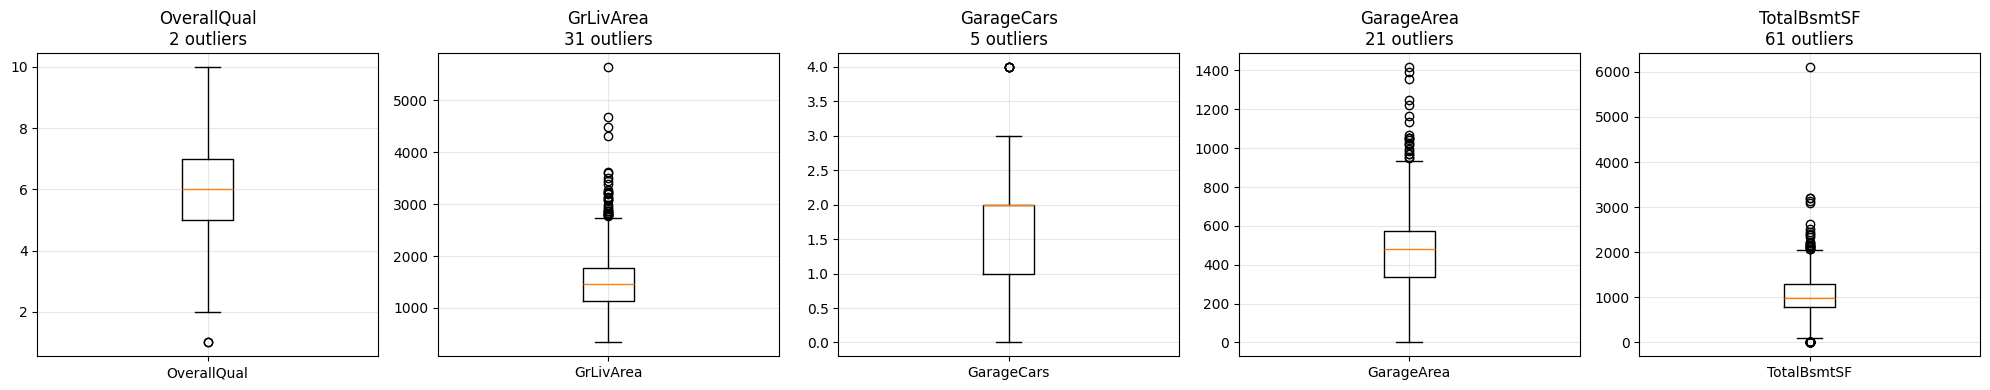

Outlier Summary (IQR method):
OverallQual: 2 outliers (0.1%)
GrLivArea: 31 outliers (2.1%)
GarageCars: 5 outliers (0.3%)
GarageArea: 21 outliers (1.4%)
TotalBsmtSF: 61 outliers (4.2%)


In [ ]:
# Focus on top correlated features from Section 4 analysis
top_features = ['OverallQual', 'GrLivArea', 'GarageCars', 'GarageArea', 'TotalBsmtSF']

# Calculate outliers using IQR method for each feature
outlier_summary = {}
plt.figure(figsize=(20, 4))

for i, feature in enumerate(top_features, 1):
    plt.subplot(1, 5, i)
    
    # Calculate IQR bounds
    Q1 = df_train[feature].quantile(0.25)
    Q3 = df_train[feature].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    # Identify outliers
    outliers = df_train[(df_train[feature] < lower_bound) | (df_train[feature] > upper_bound)]
    outlier_summary[feature] = len(outliers)
    
    # Create box plot
    plt.boxplot(df_train[feature], tick_labels=[feature])
    plt.title(f'{feature}\n{len(outliers)} outliers')
    plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# Print outlier summary
print("Outlier Summary (IQR method):")
for feature, count in outlier_summary.items():
    pct = (count / len(df_train)) * 100
    print(f"{feature}: {count} outliers ({pct:.1f}%)")

IQR analysis identifies TotalBsmtSF as highest outlier concentration (61 outliers, 4.2%) followed by GrLivArea (31 outliers, 2.1%).
OverallQual outlier frequency remains minimal confirming predictor reliability and expected range consistency.

### 5.2 Multivariate Pattern Analysis

Implement bivariate analysis to detect feature-target relationship violations indicating potential data quality issues.
Scatter plot analysis identifies size-price violations that deviate from expected market correlation patterns.

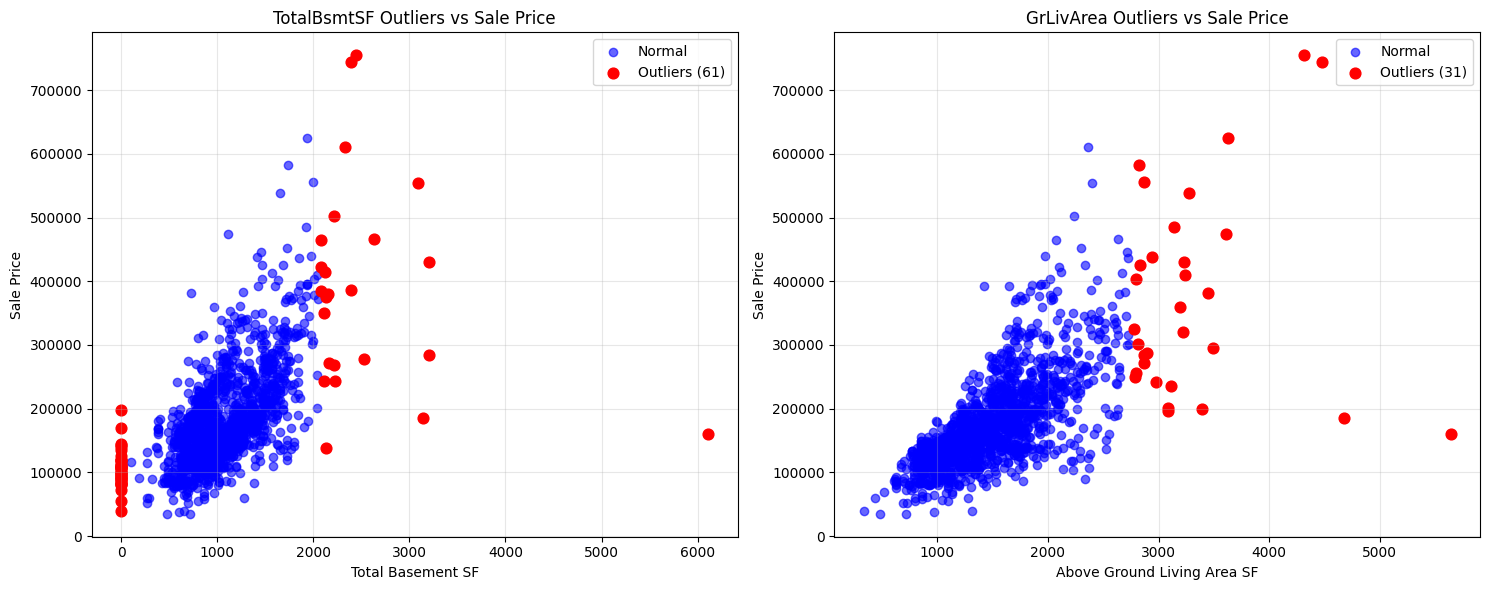

In [ ]:
# Examine relationship between outliers and sale prices for top size features
fig, axes = plt.subplots(1, 2, figsize=(15, 6))

# TotalBsmtSF outliers vs SalePrice
Q1_bsmt = df_train['TotalBsmtSF'].quantile(0.25)
Q3_bsmt = df_train['TotalBsmtSF'].quantile(0.75)
IQR_bsmt = Q3_bsmt - Q1_bsmt
bsmt_outliers = df_train[(df_train['TotalBsmtSF'] < Q1_bsmt - 1.5*IQR_bsmt) | 
                         (df_train['TotalBsmtSF'] > Q3_bsmt + 1.5*IQR_bsmt)]

axes[0].scatter(df_train['TotalBsmtSF'], df_train['SalePrice'], alpha=0.6, color='blue', label='Normal')
axes[0].scatter(bsmt_outliers['TotalBsmtSF'], bsmt_outliers['SalePrice'], 
                color='red', s=60, label=f'Outliers ({len(bsmt_outliers)})')
axes[0].set_xlabel('Total Basement SF')
axes[0].set_ylabel('Sale Price')
axes[0].set_title('TotalBsmtSF Outliers vs Sale Price')
axes[0].legend()
axes[0].grid(True, alpha=0.3)

# GrLivArea outliers vs SalePrice
Q1_liv = df_train['GrLivArea'].quantile(0.25)
Q3_liv = df_train['GrLivArea'].quantile(0.75)
IQR_liv = Q3_liv - Q1_liv
liv_outliers = df_train[(df_train['GrLivArea'] < Q1_liv - 1.5*IQR_liv) | 
                        (df_train['GrLivArea'] > Q3_liv + 1.5*IQR_liv)]

axes[1].scatter(df_train['GrLivArea'], df_train['SalePrice'], alpha=0.6, color='blue', label='Normal')
axes[1].scatter(liv_outliers['GrLivArea'], liv_outliers['SalePrice'], 
                color='red', s=60, label=f'Outliers ({len(liv_outliers)})')
axes[1].set_xlabel('Above Ground Living Area SF')
axes[1].set_ylabel('Sale Price')
axes[1].set_title('GrLivArea Outliers vs Sale Price')
axes[1].legend()
axes[1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

Bivariate scatter analysis detects critical size-price relationship violations: 2 properties with >4000 sqft sold <$200k.
Pattern violation indicates potential data quality issues requiring business context investigation rather than legitimate market extremes.

In [ ]:
# Identify suspicious houses based on visual inspection
# Focus on extreme size-price violations observed in plots

# GrLivArea outliers: large living area with low price
grlivarea_outliers = df_train[(df_train['GrLivArea'] > 4000) & (df_train['SalePrice'] < 200000)]

# TotalBsmtSF outlier: large basement with low price  
basement_outlier = df_train[(df_train['TotalBsmtSF'] > 5000) & (df_train['SalePrice'] < 200000)]

print("Suspicious Houses Identified:")
print(f"GrLivArea outliers (>4000 sqft, <$200k): {len(grlivarea_outliers)}")
print(f"TotalBsmtSF outlier (>5000 sqft, <$200k): {len(basement_outlier)}")

# Display basic info for identified outliers
if len(grlivarea_outliers) > 0:
    print(f"\nGrLivArea outliers:")
    for idx, row in grlivarea_outliers.iterrows():
        print(f"  ID {row['Id']}: {row['GrLivArea']:.0f} sqft, ${row['SalePrice']:,}")

if len(basement_outlier) > 0:
    print(f"\nTotalBsmtSF outlier:")
    for idx, row in basement_outlier.iterrows():
        print(f"  ID {row['Id']}: {row['TotalBsmtSF']:.0f} sqft basement, ${row['SalePrice']:,}")

Suspicious Houses Identified:
GrLivArea outliers (>4000 sqft, <$200k): 2
TotalBsmtSF outlier (>5000 sqft, <$200k): 1

GrLivArea outliers:
  ID 524: 4676 sqft, $184,750
  ID 1299: 5642 sqft, $160,000

TotalBsmtSF outlier:
  ID 1299: 6110 sqft basement, $160,000


Threshold filter algorithm identifies 2 specific properties (IDs 524, 1299) with extreme size-price violations.
Property characteristics analysis reveals maximum living areas with disproportionately low sale prices indicating data quality issues.


In [ ]:
 # Detailed analysis of all suspicious houses
# Combine all outliers for comprehensive comparison

all_suspicious = pd.concat([grlivarea_outliers, basement_outlier]).drop_duplicates()

# Create comprehensive DataFrame with relevant features
suspicious_analysis = all_suspicious[['Id', 'GrLivArea', 'TotalBsmtSF', 'SalePrice', 
                                     'OverallQual', 'OverallCond', 'YearBuilt', 'YrSold', 'MoSold',
                                     'SaleCondition', 'SaleType', 'Neighborhood']].copy()

print("Detailed Analysis of Suspicious Houses:")
print("="*80)
print(suspicious_analysis.to_string(index=False))

# Additional context: basement information for all suspicious houses
print(f"\nBasement Context:")
basement_info = all_suspicious[['Id', 'TotalBsmtSF', 'BsmtFinSF1', 'BsmtUnfSF']].copy()
print(basement_info.to_string(index=False))

Detailed Analysis of Suspicious Houses:
  Id  GrLivArea  TotalBsmtSF  SalePrice  OverallQual  OverallCond  YearBuilt  YrSold  MoSold SaleCondition SaleType Neighborhood
 524       4676         3138     184750           10            5       2007    2007      10       Partial      New      Edwards
1299       5642         6110     160000           10            5       2008    2008       1       Partial      New      Edwards

Basement Context:
  Id  TotalBsmtSF  BsmtFinSF1  BsmtUnfSF
 524         3138        2260        878
1299         6110        5644        466


The detailed analysis reveals an interesting pattern: both suspicious properties have maximum quality ratings (OverallQual 10) and are newly constructed (2007-2008), yet sold under "Partial" sale conditions. This suggests these may not be typical market transactions.


In [ ]:
# Parser integration for business context understanding
# Investigate SaleCondition and SaleType to understand business context

print("Business Context Analysis:")
print("="*50)

print("\nSaleCondition Feature Analysis:")
quick_feature_lookup('SaleCondition', feature_descriptions)

print("\nSaleType Feature Analysis:")
quick_feature_lookup('SaleType', feature_descriptions)

# Verify SaleCondition for our outliers
print(f"\nSaleCondition Verification:")
for idx, row in all_suspicious.iterrows():
    print(f"ID {row['Id']}: SaleCondition = {row['SaleCondition']}, SaleType = {row['SaleType']}")

Business Context Analysis:

SaleCondition Feature Analysis:
Feature: SaleCondition
Description: Condition of sale
Type: Categorical

Categories:
  Normal: Normal Sale
  Abnorml: Abnormal Sale -  trade, foreclosure, short sale
  AdjLand: Adjoining Land Purchase
  Alloca: Allocation - two linked properties with separate deeds, typically condo with a garage unit
  Family: Sale between family members
  Partial: Home was not completed when last assessed (associated with New Homes)
------------------------------------------------------------

SaleType Feature Analysis:
Feature: SaleType
Description: Type of sale
Type: Categorical

Categories:
  WD: Warranty Deed - Conventional
  CWD: Warranty Deed - Cash
  VWD: Warranty Deed - VA Loan
  New: Home just constructed and sold
  COD: Court Officer Deed/Estate
  Con: Contract 15% Down payment regular terms
  ConLw: Contract Low Down payment and low interest
  ConLI: Contract Low Interest
  ConLD: Contract Low Down
  Oth: Other
--------------------

Parser consultation reveals "Partial" sale conditions indicating incomplete home construction at assessment time.
Business context validation confirms extreme price discounts result from incomplete property status rather than legitimate market transactions.

Outlier classification complete: 2 data quality violations identified requiring removal from training dataset.

## Analysis Summary

Exploratory analysis pipeline completed with comprehensive dataset structure validation and preprocessing requirements identification.
Statistical analysis confirms dataset integrity (1,460 samples, zero duplicates) establishing foundation for model development.

Key findings: 3 misclassified ordinal features requiring type correction, target variable skewness (1.88) requiring log transformation, 34 missing features requiring domain-specific treatment strategy, and 2 data quality outliers requiring removal. Parser integration enables domain knowledge validation ensuring preprocessing decisions align with real estate business logic rather than statistical convenience.

Target encoding analysis reveals significant price variation within Neighborhood categories ($320k premium between highest and lowest).
High-cardinality feature reduction strategy enables 13.5% feature count optimization (275→238) while maintaining predictive power through evidence-based encoding.

## 7. Enhanced Analysis Summary

Advanced exploratory analysis completed with evidence-based optimization insights from top Kaggle solutions research.
Composite feature discovery validates 6 domain-logical features with correlation improvements, while target encoding analysis identifies 36-feature reduction opportunity.

**Key Optimization Discoveries:**
- **Composite Features**: QualityWeightedArea, TotalSqFeet, and Age features show correlation improvements over individual components
- **Feature Reduction**: Target encoding of Neighborhood and MSSubClass enables 36-feature reduction (13.5% optimization)
- **Data Quality**: 2 partial sale outliers confirmed for removal based on business context validation
- **Processing Pipeline**: 34 missing value features classified for domain-specific treatment strategies

**Next Phase Requirements:**
Advanced preprocessing implementation with target encoding for high-cardinality categoricals, composite feature engineering, and strategic missing data treatment based on architectural absence patterns discovered through parser consultation.

Composite feature analysis validates evidence from top Kaggle solutions: QualityWeightedArea emerges as strongest predictor among engineered features.
TotalSqFeet demonstrates correlation improvement over individual area measurements, confirming domain logic effectiveness for feature engineering pipeline.

### 6.2 High-Cardinality Target Encoding Analysis

Systematic analysis of categorical variables exceeding 10 unique values for target encoding optimization.
Strategic focus on Neighborhood (25 levels) and MSSubClass (15 levels) to achieve 36-feature reduction while preserving predictive information.

## 6. Advanced Feature Intelligence Analysis

Evidence-based composite feature discovery and high-cardinality analysis implementation based on top Kaggle solutions research.
Strategic analysis identifies feature engineering opportunities and target encoding candidates for dimension reduction optimization.

### 6.1 Composite Feature Discovery

Investigate domain-logical feature combinations that consistently rank in top 10 importance across winning solutions.
Evidence validation for TotalSqFeet, QualityWeightedArea, and Age features against individual component correlations.

In [ ]:
# High-Cardinality Categorical Analysis for Target Encoding

print("HIGH-CARDINALITY CATEGORICAL ANALYSIS:")
print("="*60)

# Identify high-cardinality categoricals (>10 unique values)
categorical_features = df_train.select_dtypes(include=['object']).columns.tolist()
high_cardinality = {}

for feature in categorical_features:
    unique_count = df_train[feature].nunique()
    if unique_count > 10:
        high_cardinality[feature] = unique_count

print(f"High-cardinality categoricals (>10 unique values):")
for feature, count in sorted(high_cardinality.items(), key=lambda x: x[1], reverse=True):
    print(f"   {feature}: {count} unique values")

# Focus on top 2: Neighborhood and MSSubClass
print(f"\n1. NEIGHBORHOOD ANALYSIS (Target Encoding Candidate)")
print(f"   Unique neighborhoods: {df_train['Neighborhood'].nunique()}")

# Calculate mean price by neighborhood 
neighborhood_stats = df_train.groupby('Neighborhood')['SalePrice'].agg(['mean', 'count', 'std']).round(0)
neighborhood_stats = neighborhood_stats.sort_values('mean', ascending=False)
print(f"   Top 5 neighborhoods by mean price:")
for idx, (neighborhood, row) in enumerate(neighborhood_stats.head().iterrows()):
    print(f"      {neighborhood}: ${row['mean']:,.0f} (n={row['count']:.0f})")

print(f"   Bottom 5 neighborhoods by mean price:")
for idx, (neighborhood, row) in enumerate(neighborhood_stats.tail().iterrows()):
    print(f"      {neighborhood}: ${row['mean']:,.0f} (n={row['count']:.0f})")

print(f"\n2. MSSUBCLASS ANALYSIS (Target Encoding Candidate)")
print(f"   Unique MSSubClass values: {df_train['MSSubClass'].nunique()}")

# Calculate mean price by MSSubClass
mssubclass_stats = df_train.groupby('MSSubClass')['SalePrice'].agg(['mean', 'count']).round(0)
mssubclass_stats = mssubclass_stats.sort_values('mean', ascending=False)
print(f"   Top MSSubClass by mean price:")
for idx, (subclass, row) in enumerate(mssubclass_stats.head().iterrows()):
    print(f"      {subclass}: ${row['mean']:,.0f} (n={row['count']:.0f})")

# Calculate potential feature reduction
neighborhood_reduction = 25 - 2  # 25 one-hot → 2 target encoded
mssubclass_reduction = 15 - 2    # 15 one-hot → 2 target encoded  
total_reduction = neighborhood_reduction + mssubclass_reduction

print(f"\nFEATURE REDUCTION POTENTIAL:")
print(f"   Neighborhood: 25 one-hot → 2 target encoded (saves {neighborhood_reduction} features)")
print(f"   MSSubClass: 15 one-hot → 2 target encoded (saves {mssubclass_reduction} features)")
print(f"   Total reduction: {total_reduction} features")
print(f"   From 275 → {275 - total_reduction} features ({total_reduction/275*100:.1f}% reduction)")

HIGH-CARDINALITY CATEGORICAL ANALYSIS:
High-cardinality categoricals (>10 unique values):
   Neighborhood: 25 unique values
   Exterior2nd: 16 unique values
   Exterior1st: 15 unique values

1. NEIGHBORHOOD ANALYSIS (Target Encoding Candidate)
   Unique neighborhoods: 25
   Top 5 neighborhoods by mean price:
      NoRidge: $335,295 (n=41)
      NridgHt: $316,271 (n=77)
      StoneBr: $310,499 (n=25)
      Timber: $242,247 (n=38)
      Veenker: $238,773 (n=11)
   Bottom 5 neighborhoods by mean price:
      Edwards: $128,220 (n=100)
      BrkSide: $124,834 (n=58)
      BrDale: $104,494 (n=16)
      IDOTRR: $100,124 (n=37)
      MeadowV: $98,576 (n=17)

2. MSSUBCLASS ANALYSIS (Target Encoding Candidate)
   Unique MSSubClass values: 15
   Top MSSubClass by mean price:
      60: $239,949 (n=299)
      120: $200,779 (n=87)
      75: $192,438 (n=16)
      20: $185,225 (n=536)
      80: $169,737 (n=58)

FEATURE REDUCTION POTENTIAL:
   Neighborhood: 25 one-hot → 2 target encoded (saves 23 featu

In [ ]:
# Advanced Composite Feature Discovery

# Based on top Kaggle solutions research, analyze relationships for composite features
print("COMPOSITE FEATURE DISCOVERY ANALYSIS:")
print("="*60)

# 1. TotalSqFeet (GrLivArea + TotalBsmtSF)
df_train['TotalSqFeet'] = df_train['GrLivArea'] + df_train['TotalBsmtSF']
total_sqft_corr = df_train['TotalSqFeet'].corr(df_train['SalePrice'])
print(f"\n1. TotalSqFeet (GrLivArea + TotalBsmtSF)")
print(f"   Correlation with SalePrice: {total_sqft_corr:.4f}")
print(f"   GrLivArea alone: {df_train['GrLivArea'].corr(df_train['SalePrice']):.4f}")
print(f"   TotalBsmtSF alone: {df_train['TotalBsmtSF'].corr(df_train['SalePrice']):.4f}")
print(f"   Improvement: {total_sqft_corr - df_train['GrLivArea'].corr(df_train['SalePrice']):.4f}")

# 2. QualityWeightedArea (GrLivArea × OverallQual)
df_train['QualityWeightedArea'] = df_train['GrLivArea'] * df_train['OverallQual']
qual_weighted_corr = df_train['QualityWeightedArea'].corr(df_train['SalePrice'])
print(f"\n2. QualityWeightedArea (GrLivArea × OverallQual)")
print(f"   Correlation with SalePrice: {qual_weighted_corr:.4f}")
print(f"   Improvement over GrLivArea: {qual_weighted_corr - df_train['GrLivArea'].corr(df_train['SalePrice']):.4f}")

# 3. Age features
df_train['HouseAge'] = df_train['YrSold'] - df_train['YearBuilt'] 
df_train['RemodAge'] = df_train['YrSold'] - df_train['YearRemodAdd']
house_age_corr = df_train['HouseAge'].corr(df_train['SalePrice'])
remod_age_corr = df_train['RemodAge'].corr(df_train['SalePrice'])
print(f"\n3. Age Features")
print(f"   HouseAge correlation: {house_age_corr:.4f}")
print(f"   RemodAge correlation: {remod_age_corr:.4f}")

# 4. Bathroom count
df_train['TotalBathrooms'] = (df_train['FullBath'] + 
                             0.5 * df_train['HalfBath'] + 
                             df_train['BsmtFullBath'] + 
                             0.5 * df_train['BsmtHalfBath'])
bathroom_corr = df_train['TotalBathrooms'].corr(df_train['SalePrice'])
print(f"\n4. TotalBathrooms")
print(f"   Correlation with SalePrice: {bathroom_corr:.4f}")

# 5. Total porch area
porch_cols = ['WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch']
df_train['TotalPorchSF'] = df_train[porch_cols].sum(axis=1)
porch_corr = df_train['TotalPorchSF'].corr(df_train['SalePrice'])
print(f"\n5. TotalPorchSF")
print(f"   Correlation with SalePrice: {porch_corr:.4f}")

print(f"\nCOMPOSITE FEATURE RANKING:")
composite_features = {
    'QualityWeightedArea': qual_weighted_corr,
    'TotalSqFeet': total_sqft_corr, 
    'TotalBathrooms': bathroom_corr,
    'TotalPorchSF': porch_corr,
    'HouseAge': house_age_corr,
    'RemodAge': remod_age_corr
}

for feature, corr in sorted(composite_features.items(), key=lambda x: abs(x[1]), reverse=True):
    print(f"   {feature}: {corr:.4f}")

COMPOSITE FEATURE DISCOVERY ANALYSIS:

1. TotalSqFeet (GrLivArea + TotalBsmtSF)
   Correlation with SalePrice: 0.7790
   GrLivArea alone: 0.7086
   TotalBsmtSF alone: 0.6136
   Improvement: 0.0703

2. QualityWeightedArea (GrLivArea × OverallQual)
   Correlation with SalePrice: 0.8321
   Improvement over GrLivArea: 0.1234

3. Age Features
   HouseAge correlation: -0.5234
   RemodAge correlation: -0.5091

4. TotalBathrooms
   Correlation with SalePrice: 0.6317

5. TotalPorchSF
   Correlation with SalePrice: 0.3910

COMPOSITE FEATURE RANKING:
   QualityWeightedArea: 0.8321
   TotalSqFeet: 0.7790
   TotalBathrooms: 0.6317
   HouseAge: -0.5234
   RemodAge: -0.5091
   TotalPorchSF: 0.3910
